# 개요

In [1586]:
'''
진에어와 제주항공의 시장 포지션을 분석하기 위해 다음 변수들을 분석해보고자 한다.
 0   내/외국인
 1   성별
 2   나이대
 3   항공사명
 4   도착국가
 5   도착공항
 6   몇 분 전에 공항 도착
 7   비행목적
 8   일행1(혼자)
 9   일행2(가족)
 10  일행3(커플)
 11  일행4(직장동료)
 12  일행5(친구)
 13  여행형태
 14  여행일수         
 '''

'\n진에어와 제주항공의 시장 포지션을 분석하기 위해 다음 변수들을 분석해보고자 한다.\n 0   내/외국인\n 1   성별\n 2   나이대\n 3   항공사명\n 4   도착국가\n 5   도착공항\n 6   몇 분 전에 공항 도착\n 7   비행목적\n 8   일행1(혼자)\n 9   일행2(가족)\n 10  일행3(커플)\n 11  일행4(직장동료)\n 12  일행5(친구)\n 13  여행형태\n 14  여행일수         \n '

# 라이브러리 불러오기

In [1587]:
#한글폰트 문제 해결하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [1588]:
#분석에 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# 데이터 로드하기

In [1589]:
df = pd.read_csv('2019년 CAPI 조사.csv',encoding='utf-8',low_memory=False)

# 데이터 전처리

### 필요한 데이터 선별 몇 변수명 변경

In [1590]:
#필요한 데이터 열 선별해서 변수로 정하기
df = df.iloc[:,[9,10,11,14,15,19,21,23,126,127,128,129,131,140,457,459,460,461,462,463,470,471.476,478,497,498]]

In [1591]:
df.head()

,-.6,-.7,-.8,오늘 이용하시는 비행편명은 무엇입니까?면접원 탑승권 / 출국 전광판 확인,-.10,귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 국가],귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 공항],귀하의 국적은?,귀하께서는 오늘 비행기 이용을 위해 비행기 출발 몇 분 전에 공항에 도착하셨습니까?,{SQ6_2}이 귀하의 최종 목적지 공항입니까? 아니면 또 다른 항공편으로 갈아탈 예정이십니까?,...,"귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요.","귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..1","귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..2","귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..3","귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..4","귀하의 이번 여행의 형태는 다음 중 어디에 해당되십니까?① 개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행하여 떠나는 여행 형태② 패키지 여행(package tour) : 여행사에서 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행 형태","이번 여행 일수(집을 떠난 총 기간)는 며칠이나 되십니까? 한국을 방문하신 경우는 한국 내 체류 일정을, 외국을 방문하실 경우는 외국 체류 예상 일정을 말씀해주세요.",오늘 항공권 발권(check-in)은 어떻게 하셨습니까?,신설/증편 희망 노선[국가],신설/증편 희망 노선[도시]
0,대상자구분,성별,연령,SQ5,SQ5_C,SQ6_1,SQ6_2,SQ7,QA4,QA5,...,QC2_1,QC2_2,QC2_3,QC2_4,QC2_5,QC3,QC4,QC7,QC10_1_1,QC10_1_2
1,외국인,여성,30대,Lj223,Lj,일본,FUK_후쿠오카,일본,NaN,NaN,...,NaN,NaN,부부/연인,NaN,NaN,개별 여행,1개월 이내(1일 ~ 30일),창구(카운터),미국,샌프란시스코
2,내국인,남성,20대,Lj223,Lj,일본,FUK_후쿠오카,한국,150,최종 목적지 공항이다,...,NaN,NaN,NaN,NaN,친구,개별 여행,1개월 이내(1일 ~ 30일),무인시스템(셀프체크인),없음,없음/확인불가
3,내국인,여성,40대,LJ223,LJ,일본,FUK_후쿠오카,한국,120,최종 목적지 공항이다,...,NaN,NaN,NaN,NaN,친구,개별 여행,1개월 이내(1일 ~ 30일),무인시스템(셀프체크인),없음,없음/확인불가
4,외국인,여성,60대,Lj223,Lj,일본,FUK_후쿠오카,일본,NaN,NaN,...,NaN,NaN,부부/연인,NaN,NaN,개별 여행,1개월 이상(31일 이상),창구(카운터),일본,나가사키


In [1592]:
#데이터에서의 변수명 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 25 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                          --------------  ----- 
 0   -.6                                                                                                                                             2250 non-null   object
 1   -.7                                                                                                                                             6652 non-null   object
 2   -.8                                                                                                                                             6652 non-null   object
 3   오늘 이용하시는 비행편명은 무엇입니까?면접원 탑승권

In [1593]:
#긴 변수명을 짧게 바꿔 새로운 데이터프레임에 넣기
df1 = pd.DataFrame(df)
df1 = df1.drop(labels=0, axis=0) #데이터가 아닌 첫번째 행 제거하기
df1.columns = ["내/외국인","성별","나이대","항공편명","항공사명","도착국가","도착공항","국적","몇 분 전에 공항 도착","환승여부","환승해서 갈 공항","환승 항공편","한승이유","귀국방식","비행목적","일행1(혼자)","일행2(가족)","일행3(커플)","일행4(직장동료)","일행5(친구)","여행형태","여행일수","발권방식","신설/증편 희망 국가","신설/증편 희망 도시",]
'''
df['내/외국인'] = df['-.6']
df['성별'] = df['-.7']
df['나이대'] = df['-.8']
df['항공편명'] = df['오늘 이용하시는 비행편명은 무엇입니까?면접원 탑승권 / 출국 전광판 확인'].str.upper()
df['항공사명'] = df['-.10'].str.upper()
df['도착국가'] = df['귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 국가]']
df['도착공항'] = df['귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 공항]']
df['국적'] = df['귀하의 국적은?']
df['몇 분 전에 공항 도착'] = df['귀하께서는 오늘 비행기 이용을 위해 비행기 출발 몇 분 전에 공항에 도착하셨습니까?']
df['환승여부'] = df['{SQ6_2}이 귀하의 최종 목적지 공항입니까? 아니면 또 다른 항공편으로 갈아탈 예정이십니까?']
df['환승해서 갈 공항'] = df['{SQ6_2}에서 최종 목적지로 가기 위해 갈아탈 다른 항공편에 대해서 응답해주십시오.[최종 목적지 공항]']
df['환승 항공편'] = df['{SQ6_2}에서 최종 목적지로 가기 위해 갈아탈 다른 항공편에 대해서 응답해주십시오.[이용 항공편]']
df['환승이유'] = df['귀하께서 최종 목적지로 가기 위해 직항이 아닌 환승을 선택할 예정이신 이유는 무엇입니까?해당되는 것을 모두 선택해주십시오..1']
df['귀국방식'] = df['귀하께서는 오늘 출발해서 {A7}으로 간다고 하셨습니다. 이번 여행/여정에서 한국으로 다시 돌아오는 경로/방법에 대하여 다음 중 어디에 해당되십니까?']
df['비행목적'] = df['귀하의 이번 여행/여정은 다음 중 어디에 속합니까? 주요 목적 1가지를 말씀해 주시기 바랍니다.(만약, 여행을 마치고 돌아가는 길이라면, 여행을 가셨던 일정에 대해 말씀해주시기 바랍니다)']
df['일행1'] = df['귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요.']
df['일행2'] = df['귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..1']
df['일행3'] = df['귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..2']
df['일행4'] = df['귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..3']
df['일행5'] = df['귀하를 포함해 함께 여행하는 일행은 다음 중 어디에 해당 되십니까? 단체여행인 경우, 다른 인원이 아닌 귀하의 직접적인 동반 일행을 기준으로 말씀해주세요..4']
df['여행형태'] = df['귀하의 이번 여행의 형태는 다음 중 어디에 해당되십니까?① 개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행하여 떠나는 여행 형태② 패키지 여행(package tour) : 여행사에서 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행 형태']
df['여행일수'] = df['이번 여행 일수(집을 떠난 총 기간)는 며칠이나 되십니까? 한국을 방문하신 경우는 한국 내 체류 일정을, 외국을 방문하실 경우는 외국 체류 예상 일정을 말씀해주세요.]
df['발권방식'] = df['오늘 항공권 발권(check-in)은 어떻게 하셨습니까?']
df['신설/증편 희망 국가'] = df['신설/증편 희망 노선[국가]']
df['신설/증편 희망 도시'] = df['신설/증편 희망 노선[도시]']
'''

"\ndf['내/외국인'] = df['-.6']\ndf['성별'] = df['-.7']\ndf['나이대'] = df['-.8']\ndf['항공편명'] = df['오늘 이용하시는 비행편명은 무엇입니까?면접원 탑승권 / 출국 전광판 확인'].str.upper()\ndf['항공사명'] = df['-.10'].str.upper()\ndf['도착국가'] = df['귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 국가]']\ndf['도착공항'] = df['귀하께서 오늘 비행기를 이용하셔서 어느 나라의 공항으로 가십니까?[도착 공항]']\ndf['국적'] = df['귀하의 국적은?']\ndf['몇 분 전에 공항 도착'] = df['귀하께서는 오늘 비행기 이용을 위해 비행기 출발 몇 분 전에 공항에 도착하셨습니까?']\ndf['환승여부'] = df['{SQ6_2}이 귀하의 최종 목적지 공항입니까? 아니면 또 다른 항공편으로 갈아탈 예정이십니까?']\ndf['환승해서 갈 공항'] = df['{SQ6_2}에서 최종 목적지로 가기 위해 갈아탈 다른 항공편에 대해서 응답해주십시오.[최종 목적지 공항]']\ndf['환승 항공편'] = df['{SQ6_2}에서 최종 목적지로 가기 위해 갈아탈 다른 항공편에 대해서 응답해주십시오.[이용 항공편]']\ndf['환승이유'] = df['귀하께서 최종 목적지로 가기 위해 직항이 아닌 환승을 선택할 예정이신 이유는 무엇입니까?해당되는 것을 모두 선택해주십시오..1']\ndf['귀국방식'] = df['귀하께서는 오늘 출발해서 {A7}으로 간다고 하셨습니다. 이번 여행/여정에서 한국으로 다시 돌아오는 경로/방법에 대하여 다음 중 어디에 해당되십니까?']\ndf['비행목적'] = df['귀하의 이번 여행/여정은 다음 중 어디에 속합니까? 주요 목적 1가지를 말씀해 주시기 바랍니다.(만약, 여행을 마치고 돌아가는 길이라면, 여행을 가셨던 일정에 대해 말씀해주시기 바랍니다)']\ndf['일행1'] = df['귀하를 포함해 함께 여행

In [1594]:
df1.describe()

,내/외국인,성별,나이대,항공편명,항공사명,도착국가,도착공항,국적,몇 분 전에 공항 도착,환승여부,...,일행1(혼자),일행2(가족),일행3(커플),일행4(직장동료),일행5(친구),여행형태,여행일수,발권방식,신설/증편 희망 국가,신설/증편 희망 도시
count,2249,6651,6651,9234,9159,9235,9235,9235,4587,4587,...,2938,2783,866,786,2071,9235,9235,9235,9235,9235
unique,2,4,15,1243,167,47,146,19,66,2,...,1,1,1,1,1,2,3,8,83,337
top,외국인,여성,40대,7c2911,7c,일본,KIX_오사카,한국,120,최종 목적지 공항이다,...,혼자(동반인 없음),가족/친지,부부/연인,직장 동료/업무상 관계자,친구,개별 여행,1개월 이내(1일 ~ 30일),창구(카운터),없음,없음/확인불가
freq,1185,2197,972,293,1480,2898,878,4315,1924,4451,...,2938,2783,866,786,2071,7036,8711,6824,6189,6189


### 항공사명 전처리

In [1595]:
#항공사명 갯수 확인하기(대소문자 구분)
df1['항공사명'].unique()

array(['Lj', 'LJ', 'Sc', 'AI', 'S7', 's7', 'S6', 'Sq', 'SG', 'Tg', 'OZ',
       'Oz', '7c', 'ci', 'Uo', 'Qr', '7C', 'Bx', 'Qv', 'KE', 'Ke', 'Mu',
       'DL', 'Ci', 'Ca', 'Jl', 'JL', 'Tw', 'Mm', 'bx', 'Dl', 'Ze', 'Fm',
       'VN', 'Vn', 'Os', 'Ga', 'Vj', 'BX', 'CA', 'VJ', 'ZE', 'CI', 'Az',
       'MM', 'D7', 'FM', 'ke', 'BR', 'Br', 'CX', 'Cx', 'ZH', 'Zh', '8y',
       'KA', 'Aa', 'AA', 'Lh', 'TG', 'SU', 'HZ', 'ca', 'oz', 'Ka', 'D5',
       'CZ', 'Ac', 'TW', 'MU', 'RS', '9C', 'Kl', 'Xj', 'XJ', 'Rs', 'Cz',
       'Kc', 'LO', 'SQ', 'Ai', '9c', 'Ho', 'Bk', 'NH', 'tw', 'ze', 'cz',
       'It', 'IT', 'jk', 'GS', 'Gs', 'yw', 'HO', 'Dz', 'ka', 'mu', 'kE',
       'BW', '8c', 'Cl', 'MG', 'jL', 'Hx', 'Hk', 'HX', 'Z2', 'UO', 'SC',
       'By', 'Mf', 'Mr', 'Mg', 'Bl', 'BL', 'Mh', 'lj', 'cx', 'Yw', 'Fe',
       'Nh', 'BK', 'Ba', 'Ua', 'UA', 'B7', 'GA', 'Kz', 'OK', 'Ok', 'Hz',
       'JＬ', 'Lo', 'sq', 'sc', 'Pr', '?6', 'AC', 'Su', 'Pn', '8Y', 'AN',
       'bk', 'T2', 'Cs', 'd7', 'Gj', 'GE', 'Ge', 'O

In [1596]:
#항공사명 대문자로 통일하기
df1['항공사명'] = df1['항공사명'].str.upper()

In [1597]:
df1['항공사명'].unique()

array(['LJ', 'SC', 'AI', 'S7', 'S6', 'SQ', 'SG', 'TG', 'OZ', '7C', 'CI',
       'UO', 'QR', 'BX', 'QV', 'KE', 'MU', 'DL', 'CA', 'JL', 'TW', 'MM',
       'ZE', 'FM', 'VN', 'OS', 'GA', 'VJ', 'AZ', 'D7', 'BR', 'CX', 'ZH',
       '8Y', 'KA', 'AA', 'LH', 'SU', 'HZ', 'D5', 'CZ', 'AC', 'RS', '9C',
       'KL', 'XJ', 'KC', 'LO', 'HO', 'BK', 'NH', 'IT', 'JK', 'GS', 'YW',
       'DZ', 'BW', '8C', 'CL', 'MG', 'HX', 'HK', 'Z2', 'BY', 'MF', 'MR',
       'BL', 'MH', 'FE', 'BA', 'UA', 'B7', 'KZ', 'OK', 'JＬ', 'PR', '?6',
       'PN', 'AN', 'T2', 'CS', 'GJ', 'GE', 'OX', 'HA', 'SV', 'VI', 'TE',
       '83', '7次', 'II', 'IC', 'M5', nan], dtype=object)

In [1598]:
#진에어와 제주항공 데이터만 선별헤 새로운 데이터프레임으로 만들기 (진에어는 LJ, 제주항공은 7C)
df2 = df1.loc[(df1['항공사명'] == '7C') | (df1['항공사명'] == 'LJ')]
#항공사 코드를 항공사명으로 전환
df2.loc[df2['항공사명']=='7C', '항공사명'] = '제주항공'
df2.loc[df2['항공사명']=='LJ', '항공사명'] = '진에어'

In [1599]:
df2['항공사명'].unique()

array(['진에어', '제주항공'], dtype=object)

In [1600]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 9154
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   내/외국인         357 non-null    object
 1   성별            1288 non-null   object
 2   나이대           1288 non-null   object
 3   항공편명          1794 non-null   object
 4   항공사명          1794 non-null   object
 5   도착국가          1794 non-null   object
 6   도착공항          1794 non-null   object
 7   국적            1794 non-null   object
 8   몇 분 전에 공항 도착  1298 non-null   object
 9   환승여부          1298 non-null   object
 10  환승해서 갈 공항     2 non-null      object
 11  환승 항공편        2 non-null      object
 12  한승이유          2 non-null      object
 13  귀국방식          1298 non-null   object
 14  비행목적          1794 non-null   object
 15  일행1(혼자)       369 non-null    object
 16  일행2(가족)       715 non-null    object
 17  일행3(커플)       197 non-null    object
 18  일행4(직장동료)     129 non-null    object
 19  일행5(친구

### 성별 전처리

In [1601]:
df2['성별'].unique()

array(['여성', '남성', nan, '2', '1'], dtype=object)

In [1602]:
#성별 분류 통일 및 결측치 처리
df2.loc[df2['성별']=='남성', '성별'] = 'M'
df2.loc[df2['성별']=='여성', '성별'] = 'F'
df2.loc[df2['성별']=='1', '성별'] = 'M'
df2.loc[df2['성별']=='2', '성별'] = 'F'
df2['성별'] = df2['성별'].replace(np.nan, 'E')

In [1603]:
df2['성별'].unique()

array(['F', 'M', 'E'], dtype=object)

### 도착공항 전처리

In [1604]:
#진에어와 제주항공을 이용하여 가는 공항명들
df2['도착공항'].unique()

array(['FUK_후쿠오카', 'NRT_동경(나리타)', 'KIX_오사카', 'VTE_비엔티안', 'DAD_다낭',
       'TPE_대북(타이완타오위안)', 'BKI_코타키나발루', 'BKK_방콕(수완나품)', 'MFM_마카오',
       'ITM_이따미', 'HND_하네다', 'KKJ_키타큐슈', 'CEB_세부', 'YNT_연대(옌타이펑라이)',
       'NGO_나고야(주부)', 'WEH_웨이하이', 'VVO_블라디보스톡', 'HKG_홍콩', 'TAO_청도(칭다오류팅)',
       'MNL_마닐라(니노이아키노)', 'KHH_카오슝', 'CTS_삿보로(치토세)', 'OKA_오끼나와(나하)',
       'TSA_쑹산(타이베이)', 'CAN_광저우', 'FSZ_시즈오카', 'CNX_치앙마이', 'SIN_싱가폴',
       'ULN_울란바토르(칭기즈칸)', 'MYJ_마즈야마', 'HKT_푸켓', 'KLO_칼리보', 'PVG_푸동',
       'NKM_나고야 공항', 'CRK_클라크 필드', 'YNJ_연길(차오양촨진)', 'KUL_쿠알라룸푸르',
       'DMK_돈무앙', 'PEK_북경', 'DYG_장가계(대용)', 'SPN_사이판'], dtype=object)

내/외국인 전처리

In [1605]:
df2['내/외국인'].unique()

array(['외국인', '내국인', nan], dtype=object)

In [1606]:
#내/외국인 분류 통일 및 결측치 처리
df2['내/외국인'] = df2['내/외국인'].replace(np.nan, 'E')

In [1607]:
df2['내/외국인'].unique()

array(['외국인', '내국인', 'E'], dtype=object)

### 일행 정보 전처리

In [1608]:
#가족여행 관련 분석에 필요한 변수만 다시 선별헤 새로운 데이터프레임으로 만들기
df3 = df2.iloc[:,[0,1,2,4,5,6,8,14,15,16,17,18,19,20,21]]
df3

,내/외국인,성별,나이대,항공사명,도착국가,도착공항,몇 분 전에 공항 도착,비행목적,일행1(혼자),일행2(가족),일행3(커플),일행4(직장동료),일행5(친구),여행형태,여행일수
1,외국인,F,30대,진에어,일본,FUK_후쿠오카,NaN,여가/위락/개별휴가,NaN,NaN,부부/연인,NaN,NaN,개별 여행,1개월 이내(1일 ~ 30일)
2,내국인,M,20대,진에어,일본,FUK_후쿠오카,150,여가/위락/개별휴가,NaN,NaN,NaN,NaN,친구,개별 여행,1개월 이내(1일 ~ 30일)
3,내국인,F,40대,진에어,일본,FUK_후쿠오카,120,여가/위락/개별휴가,NaN,NaN,NaN,NaN,친구,개별 여행,1개월 이내(1일 ~ 30일)
4,외국인,F,60대,진에어,일본,FUK_후쿠오카,NaN,쇼핑,NaN,NaN,부부/연인,NaN,NaN,개별 여행,1개월 이상(31일 이상)
5,내국인,F,20대,진에어,일본,FUK_후쿠오카,120,여가/위락/개별휴가,혼자(동반인 없음),NaN,NaN,NaN,NaN,개별 여행,1개월 이내(1일 ~ 30일)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150,E,M,2,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,NaN,NaN,NaN,NaN,친구,개별 여행,1개월 이내(1일 ~ 30일)
9151,E,M,4,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,NaN,NaN,NaN,NaN,친구,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)
9152,E,F,5,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,NaN,NaN,NaN,NaN,친구,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)
9153,E,F,2,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,NaN,가족/친지,NaN,NaN,NaN,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)


In [1609]:
#일행 정보 원핫인코딩(One hot encoding)으로 전처리
df3['일행1(혼자)'] = df3['일행1(혼자)'].replace(np.nan,0)
df3["일행1(혼자)"] = df3["일행1(혼자)"].apply(lambda x: 1 if x!=0 else 0)
df3['일행2(가족)'] = df3['일행2(가족)'].replace(np.nan,0)
df3["일행2(가족)"] = df3["일행2(가족)"].apply(lambda x: 1 if x!=0 else 0)
df3['일행3(커플)'] = df3['일행3(커플)'].replace(np.nan,0)
df3["일행3(커플)"] = df3["일행3(커플)"].apply(lambda x: 1 if x!=0 else 0)
df3['일행4(직장동료)'] = df3['일행4(직장동료)'].replace(np.nan,0)
df3["일행4(직장동료)"] = df3["일행4(직장동료)"].apply(lambda x: 1 if x!=0 else 0)
df3['일행5(친구)'] = df3['일행5(친구)'].replace(np.nan,0)
df3["일행5(친구)"] = df3["일행5(친구)"].apply(lambda x: 1 if x!=0 else 0)
df3

,내/외국인,성별,나이대,항공사명,도착국가,도착공항,몇 분 전에 공항 도착,비행목적,일행1(혼자),일행2(가족),일행3(커플),일행4(직장동료),일행5(친구),여행형태,여행일수
1,외국인,F,30대,진에어,일본,FUK_후쿠오카,NaN,여가/위락/개별휴가,0,0,1,0,0,개별 여행,1개월 이내(1일 ~ 30일)
2,내국인,M,20대,진에어,일본,FUK_후쿠오카,150,여가/위락/개별휴가,0,0,0,0,1,개별 여행,1개월 이내(1일 ~ 30일)
3,내국인,F,40대,진에어,일본,FUK_후쿠오카,120,여가/위락/개별휴가,0,0,0,0,1,개별 여행,1개월 이내(1일 ~ 30일)
4,외국인,F,60대,진에어,일본,FUK_후쿠오카,NaN,쇼핑,0,0,1,0,0,개별 여행,1개월 이상(31일 이상)
5,내국인,F,20대,진에어,일본,FUK_후쿠오카,120,여가/위락/개별휴가,1,0,0,0,0,개별 여행,1개월 이내(1일 ~ 30일)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150,E,M,2,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,0,0,0,0,1,개별 여행,1개월 이내(1일 ~ 30일)
9151,E,M,4,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,0,0,0,0,1,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)
9152,E,F,5,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,0,0,0,0,1,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)
9153,E,F,2,제주항공,대만,TSA_쑹산(타이베이),120,여가/위락/개별휴가,0,1,0,0,0,패키지 여행(Package tour),1개월 이내(1일 ~ 30일)


### 몇 분 전에 공항 도착 전처리

In [1610]:
df3['몇 분 전에 공항 도착'].unique()

array([nan, '150', '120', '180', '90', '110', '50', '60', '100', '210',
       '720', '45', '240', '300', '190', '160', '30', '130', '260', '200',
       '170', '95', '20', '80', '70', '420', '152', '128', '98', '158',
       '140', '220', '250', '350', '185', '400', '265', '320', '230',
       '270', '360', '108', '930', '138', '450', '308', '40', '480',
       '208', '290', '21', '135'], dtype=object)

In [1611]:
#'몇 분 전에 공항 도착'를 int형 데이터로 바꿔서 분석하기 위해 미리 카피 만듦
df4 = df3.copy()

In [1612]:
#df3의 결측치 'E'로 처리
df3['몇 분 전에 공항 도착'] = df3['몇 분 전에 공항 도착'].replace(np.nan, 'E')
#df4의 결측치 '0'로 처리
df4['몇 분 전에 공항 도착'] = df4['몇 분 전에 공항 도착'].replace(np.nan, '0')

In [1613]:
#df4의 값들 int형 데이터로 바꾸기
df4['몇 분 전에 공항 도착'] = df4['몇 분 전에 공항 도착'].astype("int")

### 나이대 전처리

In [1614]:
df3['나이대'].unique()

array(['30대', '20대', '40대', '60대', '50대', '70대 이상', '15세 ~ 20세 미만', nan,
       '15세-20세 미만', '4', '5', '1', '6', '3', '2', '7'], dtype=object)

In [1615]:
#1,2,3,4,5,6,7은 데이터에서 각각 10대,20대,30대,40대,50대,60대,70대 이상으로 대응
df3.loc[df3['나이대']=='1', '나이대'] = '10대'
df3.loc[df3['나이대']=='2', '나이대'] = '20대'
df3.loc[df3['나이대']=='3', '나이대'] = '30대'
df3.loc[df3['나이대']=='4', '나이대'] = '40대'
df3.loc[df3['나이대']=='5', '나이대'] = '50대'
df3.loc[df3['나이대']=='6', '나이대'] = '60대'
df3.loc[df3['나이대']=='7', '나이대'] = '70대 이상'
df3.loc[df3['나이대']=='15세 ~ 20세 미만', '나이대'] = '10대'
df3.loc[df3['나이대']=='15세-20세 미만', '나이대'] = '10대'
df3['나이대'] = df3['나이대'].replace(np.nan, 'E')

### 일행 정보 추가 전처리

In [1616]:
#일행 데이터 추후에 평균값으로 비율 구할때 %값으로 나올 수 있도록 미리 100 곱하기
df3['일행1(혼자)'] = df3['일행1(혼자)']*100
df4['일행1(혼자)'] = df4['일행1(혼자)']*100
df3['일행2(가족)'] = df3['일행2(가족)']*100
df4['일행2(가족)'] = df4['일행2(가족)']*100
df3['일행3(커플)'] = df3['일행3(커플)']*100
df4['일행3(커플)'] = df4['일행3(커플)']*100
df3['일행4(직장동료)'] = df3['일행4(직장동료)']*100
df4['일행4(직장동료)'] = df4['일행4(직장동료)']*100
df3['일행5(친구)'] = df3['일행5(친구)']*100
df4['일행5(친구)'] = df4['일행5(친구)']*100

### 전처리 데이터 변수별 변수값 종류 확인

In [1617]:
df3['내/외국인'].unique()

array(['외국인', '내국인', 'E'], dtype=object)

In [1618]:
df3['성별'].unique()

array(['F', 'M', 'E'], dtype=object)

In [1619]:
df3['나이대'].unique()

array(['30대', '20대', '40대', '60대', '50대', '70대 이상', '10대', 'E'],
      dtype=object)

In [1620]:
df3['항공사명'].unique()

array(['진에어', '제주항공'], dtype=object)

In [1621]:
df3['도착국가'].unique()

array(['일본', '라오스', '베트남', '대만', '말레이시아', '태국', '홍콩', '필리핀', '마카오', '중국',
       '러시아', '싱가포르', '몽골', '미국'], dtype=object)

In [1622]:
df3['도착공항'].unique()

array(['FUK_후쿠오카', 'NRT_동경(나리타)', 'KIX_오사카', 'VTE_비엔티안', 'DAD_다낭',
       'TPE_대북(타이완타오위안)', 'BKI_코타키나발루', 'BKK_방콕(수완나품)', 'MFM_마카오',
       'ITM_이따미', 'HND_하네다', 'KKJ_키타큐슈', 'CEB_세부', 'YNT_연대(옌타이펑라이)',
       'NGO_나고야(주부)', 'WEH_웨이하이', 'VVO_블라디보스톡', 'HKG_홍콩', 'TAO_청도(칭다오류팅)',
       'MNL_마닐라(니노이아키노)', 'KHH_카오슝', 'CTS_삿보로(치토세)', 'OKA_오끼나와(나하)',
       'TSA_쑹산(타이베이)', 'CAN_광저우', 'FSZ_시즈오카', 'CNX_치앙마이', 'SIN_싱가폴',
       'ULN_울란바토르(칭기즈칸)', 'MYJ_마즈야마', 'HKT_푸켓', 'KLO_칼리보', 'PVG_푸동',
       'NKM_나고야 공항', 'CRK_클라크 필드', 'YNJ_연길(차오양촨진)', 'KUL_쿠알라룸푸르',
       'DMK_돈무앙', 'PEK_북경', 'DYG_장가계(대용)', 'SPN_사이판'], dtype=object)

In [1623]:
df3['몇 분 전에 공항 도착'].unique()

array(['E', '150', '120', '180', '90', '110', '50', '60', '100', '210',
       '720', '45', '240', '300', '190', '160', '30', '130', '260', '200',
       '170', '95', '20', '80', '70', '420', '152', '128', '98', '158',
       '140', '220', '250', '350', '185', '400', '265', '320', '230',
       '270', '360', '108', '930', '138', '450', '308', '40', '480',
       '208', '290', '21', '135'], dtype=object)

In [1624]:
df4['몇 분 전에 공항 도착'].unique()

array([  0, 150, 120, 180,  90, 110,  50,  60, 100, 210, 720,  45, 240,
       300, 190, 160,  30, 130, 260, 200, 170,  95,  20,  80,  70, 420,
       152, 128,  98, 158, 140, 220, 250, 350, 185, 400, 265, 320, 230,
       270, 360, 108, 930, 138, 450, 308,  40, 480, 208, 290,  21, 135])

In [1625]:
df3['비행목적'].unique()

array(['여가/위락/개별휴가', '쇼핑', '친구, 친지 방문', '교육(어학프로그램, 연수 등)', '비즈니스 또는 업무',
       '본가방문', '미용, 건강 및 치료', '대학진학을 위한 면접'], dtype=object)

In [1626]:
df3['여행형태'].unique()

array(['개별 여행', '패키지 여행(Package tour)'], dtype=object)

In [1627]:
df3['여행일수'].unique()

array(['1개월 이내(1일 ~ 30일)', '1개월 이상(31일 이상)', '이민/여행 등 편도 일정'],
      dtype=object)

In [1628]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 9154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   내/외국인         1794 non-null   object
 1   성별            1794 non-null   object
 2   나이대           1794 non-null   object
 3   항공사명          1794 non-null   object
 4   도착국가          1794 non-null   object
 5   도착공항          1794 non-null   object
 6   몇 분 전에 공항 도착  1794 non-null   object
 7   비행목적          1794 non-null   object
 8   일행1(혼자)       1794 non-null   int64 
 9   일행2(가족)       1794 non-null   int64 
 10  일행3(커플)       1794 non-null   int64 
 11  일행4(직장동료)     1794 non-null   int64 
 12  일행5(친구)       1794 non-null   int64 
 13  여행형태          1794 non-null   object
 14  여행일수          1794 non-null   object
dtypes: int64(5), object(10)
memory usage: 224.2+ KB


In [1629]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 9154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   내/외국인         1794 non-null   object
 1   성별            1794 non-null   object
 2   나이대           1288 non-null   object
 3   항공사명          1794 non-null   object
 4   도착국가          1794 non-null   object
 5   도착공항          1794 non-null   object
 6   몇 분 전에 공항 도착  1794 non-null   int64 
 7   비행목적          1794 non-null   object
 8   일행1(혼자)       1794 non-null   int64 
 9   일행2(가족)       1794 non-null   int64 
 10  일행3(커플)       1794 non-null   int64 
 11  일행4(직장동료)     1794 non-null   int64 
 12  일행5(친구)       1794 non-null   int64 
 13  여행형태          1794 non-null   object
 14  여행일수          1794 non-null   object
dtypes: int64(6), object(9)
memory usage: 224.2+ KB


### 전처리 데이터 변수별 변수값 갯수 확인

In [1630]:
df3['내/외국인'].value_counts()

E      1437
내국인     255
외국인     102
Name: 내/외국인, dtype: int64

In [1631]:
df3['성별'].value_counts()

F    659
M    629
E    506
Name: 성별, dtype: int64

In [1632]:
df3['나이대'].value_counts()

E         506
50대       300
40대       296
30대       233
20대       227
60대       137
10대        68
70대 이상     27
Name: 나이대, dtype: int64

In [1633]:
df3['항공사명'].value_counts()

제주항공    1611
진에어      183
Name: 항공사명, dtype: int64

In [1634]:
df3['도착국가'].value_counts()

일본       581
대만       441
베트남      345
태국       151
중국        90
필리핀       77
말레이시아     29
러시아       24
싱가포르      22
홍콩        15
라오스        9
마카오        6
몽골         3
미국         1
Name: 도착국가, dtype: int64

In [1635]:
df3['도착공항'].value_counts()

DAD_다낭             343
TPE_대북(타이완타오위안)    253
KIX_오사카            195
TSA_쑹산(타이베이)       176
FUK_후쿠오카           147
NRT_동경(나리타)        144
BKK_방콕(수완나품)       137
CEB_세부              64
YNJ_연길(차오양촨진)       32
ITM_이따미             29
BKI_코타키나발루          25
VVO_블라디보스톡          24
MFM_마카오             23
SIN_싱가폴             22
KKJ_키타큐슈            20
YNT_연대(옌타이펑라이)      15
CNX_치앙마이            13
KHH_카오슝             13
WEH_웨이하이            11
MNL_마닐라(니노이아키노)     11
NKM_나고야 공항          10
HND_하네다              9
PVG_푸동               9
DYG_장가계(대용)          9
VTE_비엔티안             9
FSZ_시즈오카             8
CTS_삿보로(치토세)         7
HKG_홍콩               6
NGO_나고야(주부)          6
OKA_오끼나와(나하)         5
KUL_쿠알라룸푸르           4
ULN_울란바토르(칭기즈칸)      3
HKT_푸켓               2
CRK_클라크 필드           2
TAO_청도(칭다오류팅)        2
PEK_북경               1
DMK_돈무앙              1
MYJ_마즈야마             1
KLO_칼리보              1
CAN_광저우              1
SPN_사이판              1
Name: 도착공항, dtype: int64

In [1636]:
df3['몇 분 전에 공항 도착'].value_counts()

120    501
E      496
180    214
150    188
90      57
60      42
240     41
130     39
100     29
160     23
200     21
300     19
140     14
128     12
210     11
170      8
110      7
70       7
80       6
30       5
50       5
420      4
108      4
20       4
190      3
250      3
40       3
158      2
220      2
45       2
208      1
21       1
360      1
290      1
480      1
308      1
450      1
138      1
930      1
152      1
270      1
230      1
320      1
265      1
400      1
185      1
350      1
98       1
95       1
260      1
720      1
135      1
Name: 몇 분 전에 공항 도착, dtype: int64

In [1637]:
df3['비행목적'].value_counts()

여가/위락/개별휴가          1425
친구, 친지 방문            132
비즈니스 또는 업무           116
쇼핑                    75
교육(어학프로그램, 연수 등)      31
미용, 건강 및 치료            9
본가방문                   5
대학진학을 위한 면접            1
Name: 비행목적, dtype: int64

In [1638]:
df3['일행1(혼자)'].value_counts()

0      1425
100     369
Name: 일행1(혼자), dtype: int64

In [1639]:
df3['일행2(가족)'].value_counts()

0      1079
100     715
Name: 일행2(가족), dtype: int64

In [1640]:
df3['일행3(커플)'].value_counts()

0      1597
100     197
Name: 일행3(커플), dtype: int64

In [1641]:
df3['일행4(직장동료)'].value_counts()

0      1665
100     129
Name: 일행4(직장동료), dtype: int64

In [1642]:
df3['일행5(친구)'].value_counts()

0      1368
100     426
Name: 일행5(친구), dtype: int64

In [1643]:
df3['여행형태'].value_counts()

개별 여행                   1095
패키지 여행(Package tour)     699
Name: 여행형태, dtype: int64

In [1644]:
df3['여행일수'].value_counts()

1개월 이내(1일 ~ 30일)    1740
1개월 이상(31일 이상)        40
이민/여행 등 편도 일정         14
Name: 여행일수, dtype: int64

`#데이터 분석 및 시각화`



# 1. 진에어 & 제주항공 통합 분석

### 1.1. 항공사명 분석

In [1645]:
df3_airline  = df3.groupby('항공사명').mean()
df3_airline = df3_airline.round(decimals = 2)
df3_airline

#저장 및 다운로드 기능
#df3_airline.to_csv('1.1. 항공사명 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.1. 항공사명 분석.csv')

,일행1(혼자),일행2(가족),일행3(커플),일행4(직장동료),일행5(친구)
항공사명,,,,,
제주항공,19.62,40.16,10.80,7.57,23.96
진에어,28.96,37.16,12.57,3.83,21.86


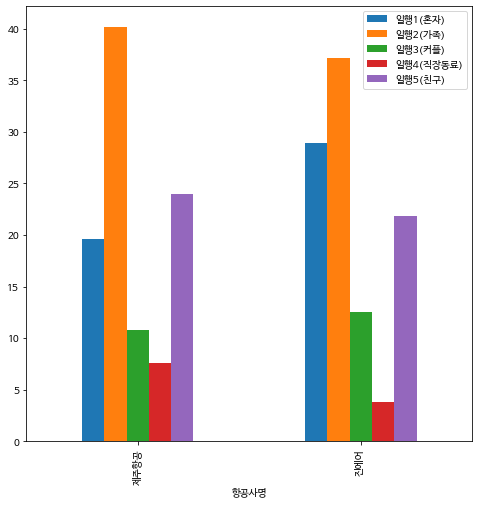

In [1646]:
df3_airline.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.1. 항공사명 분석.png")
#files.download("1.1. 항공사명 분석.png") 

### 1.2. 내/외국인 분석

In [1647]:
df3_nat = df3.loc[(df3['내/외국인'] == '내국인')|(df3['내/외국인'] == '외국인')]
df3_nat = df3_nat.groupby(['항공사명', '내/외국인']).mean().round(decimals = 2)
df3_nat

#저장 및 다운로드 기능
#df3_nat.to_csv('1.2. 내/외국인 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.2. 내/외국인 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 내/외국인                                               
제주항공 내국인      11.16    46.43     8.93       5.80    29.46
     외국인      35.06    15.58     7.79       1.30    40.26
진에어  내국인      22.58    51.61    19.35       3.23     9.68
     외국인      28.00    28.00    24.00       0.00    20.00

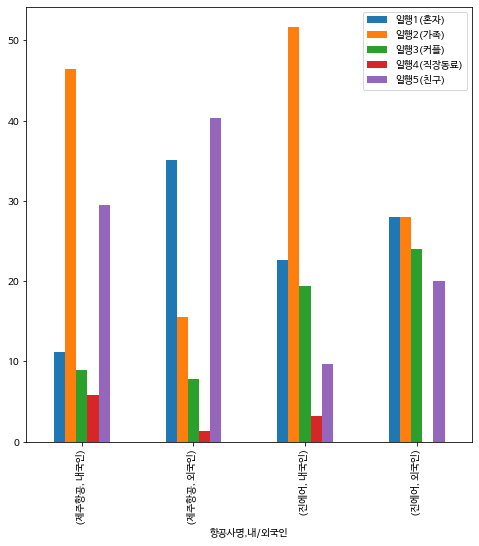

In [1648]:
df3_nat.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.2. 내/외국인 분석.png")
#files.download("1.2. 내/외국인 분석.png") 

### 1.3. 성별 분석

In [1649]:
df3_sex = df3.groupby(['항공사명', '성별']).mean().round(decimals = 2)
df3_sex

#저장 및 다운로드 기능
#df3_sex.to_csv('1.3. 성별 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.3. 성별 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 성별                                               
제주항공 E     18.98    44.59    16.56       6.84    17.88
     F     14.89    41.29     8.46       4.57    32.49
     M     25.04    35.45     8.64      11.29    19.93
진에어  E     24.53    50.94     7.55       0.00    22.64
     F     26.47    38.24    10.29       1.47    23.53
     M     35.48    24.19    19.35       9.68    19.35

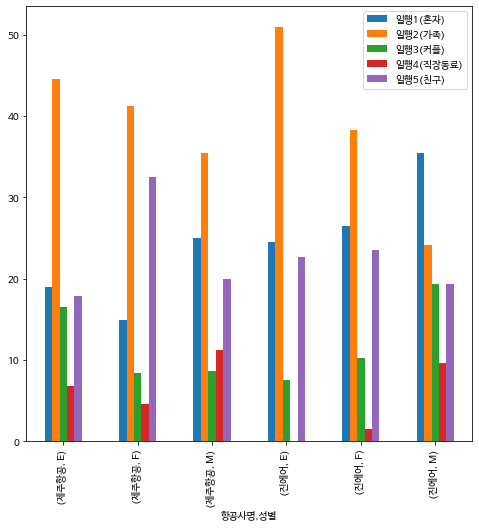

In [1650]:
df3_sex.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.3. 성별 분석.png")
#files.download("1.3. 성별 분석.png") 

### 1.4. 나이대 분석

In [1651]:
df3_age = df3.loc[(df3['나이대'] == '10대')|(df3['나이대'] == '20대')|(df3['나이대'] == '30대')|(df3['나이대'] == '40대')|(df3['나이대'] == '50대')|(df3['나이대'] == '60대')|(df3['나이대'] == '70대 이상')]
df3_age = df3_age.groupby(['항공사명', '나이대']).mean().round(decimals = 2)
df3_age

#저장 및 다운로드 기능
#df3_age.to_csv('1.4. 나이대 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.4. 나이대 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 나이대                                                  
제주항공 10대        6.56    78.69     0.00       1.64    14.75
     20대       30.10    25.00     5.10       5.10    35.71
     30대       27.36    35.85    10.85       5.66    22.17
     40대       17.41    42.96     8.15       8.89    23.70
     50대       15.41    32.97    10.75      11.47    29.39
     60대       15.65    43.48     9.57       9.57    23.48
     70대 이상     4.00    56.00    12.00       4.00    24.00
진에어  10대       14.29    42.86     0.00       0.00    42.86
     20대       54.84    16.13     6.45       0.00    22.58
     30대       33.33    14.29    19.05       4.76    28.57
     40대       19.23    50.00    15.38      11.54    11.54
     50대       28.57    52.38    14.29       4.76     4.76
     60대       18.18    22.73    27.27       4.55    36.36
     70대 이상     0.00    50.00     0.00      50.00     0.00

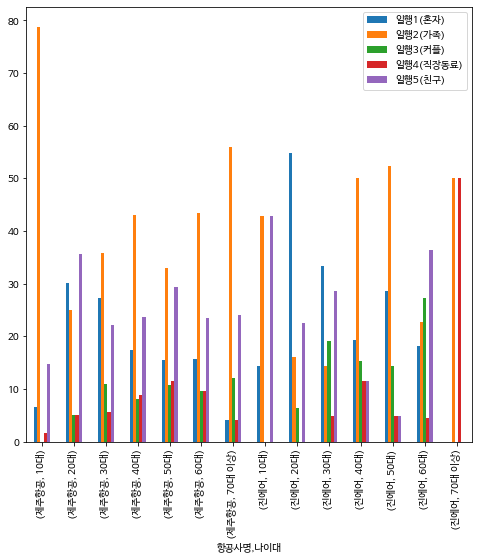

In [1652]:
df3_age.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.4. 나이대 분석.png")
#files.download("1.4. 나이대 분석.png") 

### 1.5. 도착국가 분석

In [1653]:
df3_country = df3.groupby(['항공사명','도착국가']).mean().round(decimals = 2)
df3_country

#저장 및 다운로드 기능
#df3_country.to_csv('1.5. 도착국가 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.5. 도착국가 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착국가                                                
제주항공 대만        8.84    43.76    15.19       6.12    30.16
     라오스       0.00     0.00     0.00     100.00     0.00
     러시아      41.67    33.33     4.17      12.50     4.17
     마카오      33.33    16.67     0.00       0.00    50.00
     말레이시아     9.09    40.91     9.09       0.00    40.91
     몽골        0.00   100.00     0.00       0.00     0.00
     미국        0.00     0.00   100.00       0.00     0.00
     베트남       3.72    51.70    11.15      10.84    24.15
     싱가포르     19.05    23.81     9.52      19.05    33.33
     일본       38.77    31.72     7.27       4.41    18.94
     중국       37.50    16.25     5.00       5.00    37.50
     태국       17.99    41.73    16.55       9.35    18.71
     필리핀      17.81    52.05     5.48       9.59    13.70
     홍콩       20.00    53.33     6.67       0.00    20.00
진에어  말레이시아    42.86    42.86    28.57       0.00     0.00
     베트남       9.09    40.91    40.91       9.09    13.64
     싱가포르      0.00     0.00     0.00       0.00   100.00
     일본       33.07    35.43     7.87       3.15    22.83
     중국       10.00    50.00     0.00      10.00    30.00
     태국       25.00    33.33    16.67       0.00    33.33
     필리핀      50.00    50.00     0.00       0.00     0.00

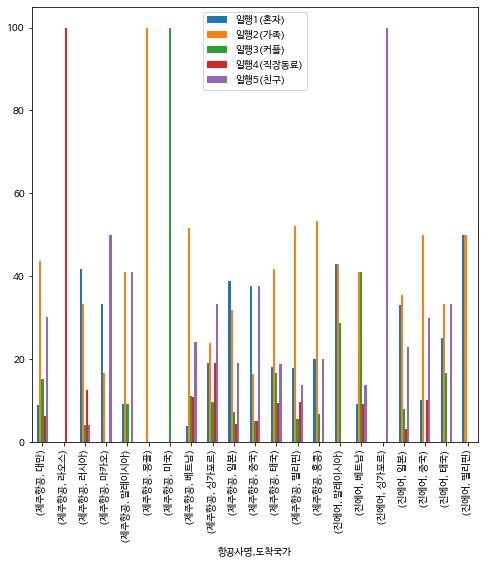

In [1654]:
df3_country.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.5. 도착국가 분석.png")
#files.download("1.5. 도착국가 분석.png") 

### 1.6. 도착공항 분석

In [1655]:
df3_port = df3.groupby(['항공사명', '도착공항']).mean().round(decimals = 2)
df3_port

#저장 및 다운로드 기능
#df3_port.to_csv('1.6. 도착공항 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.6. 도착공항 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착공항                                                          
제주항공 BKI_코타키나발루          5.56    50.00     5.56       0.00    38.89
     BKK_방콕(수완나품)       15.62    43.75    14.06      10.16    20.31
     CAN_광저우             0.00   100.00     0.00       0.00     0.00
     CEB_세부             11.11    57.14     7.94       7.94    15.87
     CNX_치앙마이           46.15    15.38    38.46       0.00     7.69
     CTS_삿보로(치토세)       42.86    42.86     0.00       0.00    14.29
     DAD_다낭              3.74    52.02    10.90      10.90    23.99
     DYG_장가계(대용)         0.00    11.11    11.11      11.11    66.67
     FSZ_시즈오카           50.00    37.50     0.00       0.00    12.50
     FUK_후쿠오카           32.52    38.21    11.38       4.07    17.07
     HKG_홍콩             50.00    16.67    16.67       0.00    16.67
     HND_하네다            55.56    33.33    11.11       0.00     0.00
     ITM_이따미            19.05    47.62     4.76       0.00    23.81
     KHH_카오슝            30.77    30.77    15.38       0.00    23.08
     KIX_오사카            31.65    30.94     4.32       5.76    28.78
     KUL_쿠알라룸푸르         25.00     0.00    25.00       0.00    50.00
     MFM_마카오            22.73    40.91     0.00       4.55    31.82
     MNL_마닐라(니노이아키노)    54.55     9.09     0.00      18.18     9.09
     MYJ_마즈야마          100.00     0.00     0.00       0.00     0.00
     NGO_나고야(주부)        33.33    33.33     0.00       0.00    33.33
     NKM_나고야 공항         70.00    20.00    10.00       0.00     0.00
     NRT_동경(나리타)        52.00    23.20     6.40       5.60    12.00
     OKA_오끼나와(나하)       20.00    40.00    40.00       0.00    20.00
     PEK_북경              0.00     0.00     0.00       0.00   100.00
     SIN_싱가폴            19.05    23.81     9.52      19.05    33.33
     SPN_사이판             0.00     0.00   100.00       0.00     0.00
     TAO_청도(칭다오류팅)       0.00     0.00     0.00       0.00   100.00
     TPE_대북(타이완타오위안)     7.91    45.45    19.37       5.53    25.69
     TSA_쑹산(타이베이)        8.52    42.61     9.09       7.39    37.50
     ULN_울란바토르(칭기즈칸)     0.00   100.00     0.00       0.00     0.00
     VTE_비엔티안            0.00     0.00     0.00     100.00     0.00
     VVO_블라디보스톡         41.67    33.33     4.17      12.50     4.17
     WEH_웨이하이           72.73     9.09     0.00       0.00    18.18
     YNJ_연길(차오양촨진)      31.25    25.00     9.38       6.25    28.12
     YNT_연대(옌타이펑라이)     53.33     6.67     0.00       0.00    40.00
진에어  BKI_코타키나발루         42.86    42.86    28.57       0.00     0.00
     BKK_방콕(수완나품)       22.22    22.22    22.22       0.00    44.44
     CEB_세부              0.00   100.00     0.00       0.00     0.00
     CRK_클라크 필드        100.00     0.00     0.00       0.00     0.00
     DAD_다낭              9.09    40.91    40.91       9.09    13.64
     DMK_돈무앙           100.00     0.00     0.00       0.00     0.00
     FUK_후쿠오카           41.67    16.67    25.00       0.00    16.67
     HKT_푸켓              0.00   100.00     0.00       0.00     0.00
     ITM_이따미            25.00    50.00     0.00       0.00    25.00
     KIX_오사카            32.14    35.71     1.79       7.14    25.00
     KKJ_키타큐슈           15.00    55.00    10.00       0.00    30.00
     KLO_칼리보             0.00   100.00     0.00       0.00     0.00
     MFM_마카오           100.00     0.00     0.00       0.00     0.00
     NRT_동경(나리타)        47.37    31.58     5.26       0.00    15.79
     PVG_푸동              0.00    55.56     0.00      11.11    33.33
     SIN_싱가폴             0.00     0.00     0.00       0.00   100.00

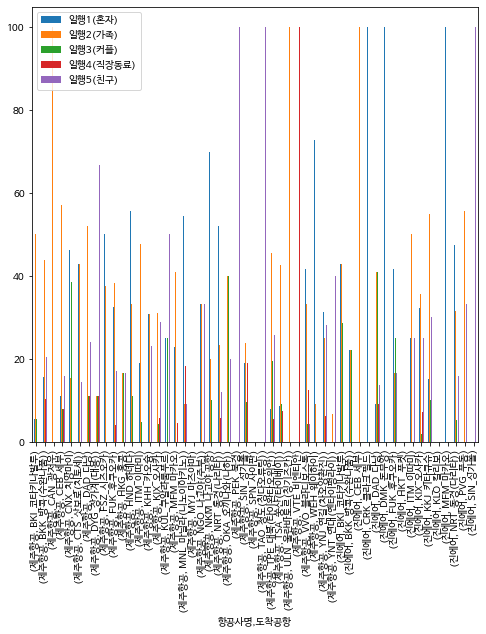

In [1656]:
df3_port.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.6. 도착공항 분석.png")
#files.download("1.6. 도착공항 분석.png") 

### 1.7. 몇 분 전에 공항 도착 분석

In [1657]:
df4_min = df4.groupby(['항공사명', '몇 분 전에 공항 도착']).mean().round(decimals = 2)
df4_min = df4_min.drop(df4_min.index[0])
df4_min

#저장 및 다운로드 기능
#df4_min.to_csv('1.7. 몇 분 전에 공항 도착 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.7. 몇 분 전에 공항 도착 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 몇 분 전에 공항 도착                                               
제주항공 20                0.0    75.00      0.0       0.00    25.00
     21                0.0   100.00      0.0       0.00     0.00
     30                0.0    60.00     20.0      20.00     0.00
     40                0.0    66.67      0.0      33.33    33.33
     45                0.0     0.00      0.0       0.00   100.00
...                    ...      ...      ...        ...      ...
진에어  240              20.0    40.00     20.0      10.00    10.00
     265               0.0     0.00    100.0       0.00     0.00
     300              50.0    50.00      0.0       0.00     0.00
     420              25.0    50.00     25.0       0.00     0.00
     720             100.0     0.00      0.0       0.00     0.00

[65 rows x 5 columns]

제주항공 데이터만 '몇 분 전에 공항 도착' 오름차순으로 따로 선별

In [1658]:
df4_min_jeju = df4.groupby(['항공사명', '몇 분 전에 공항 도착']).mean().round(decimals = 2).head(49)
df4_min_jeju = df4_min_jeju.drop(df4_min_jeju.index[0]).iloc[:, [1]]
df4_min_jeju

일행2(가족)
항공사명 몇 분 전에 공항 도착         
제주항공 20              75.00
     21             100.00
     30              60.00
     40              66.67
     45               0.00
     50               0.00
     60              45.00
     70              57.14
     80              16.67
     90              32.14
     95               0.00
     98               0.00
     100             46.43
     108             75.00
     110             28.57
     120             45.38
     128             70.00
     130             56.41
     135            100.00
     138            100.00
     140             69.23
     150             48.00
     152            100.00
     158            100.00
     160             52.17
     170             50.00
     180             42.11
     185              0.00
     190             66.67
     200             45.00
     208              0.00
     210             44.44
     220            100.00
     230              0.00
     240             32.26
     250             66.67
     260              0.00
     270              0.00
     290            100.00
     300             35.29
     308              0.00
     320              0.00
     350              0.00
     360            100.00
     400              0.00
     450            100.00
     480              0.00
     930              0.00

진에어 데이터만 '몇 분 전에 공항 도착' 오름차순으로 따로 선별

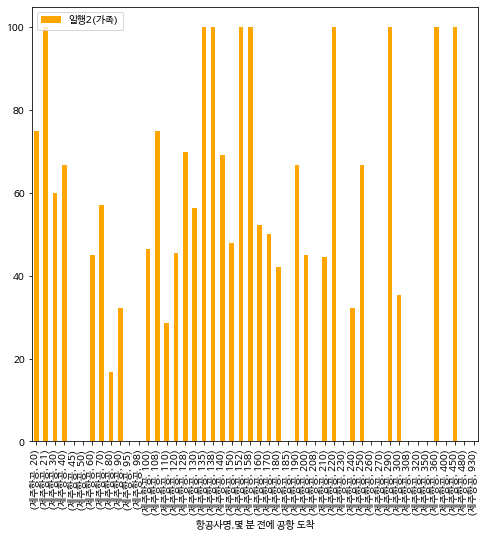

In [1659]:
df4_min_jeju.plot.bar(figsize=(8, 8), color='orange', rot=90)

#저장 및 다운로드 기능
#plt.savefig("1.7. 몇 분 전에 공항 도착 분석(제주항공).png")
#files.download("1.7. 몇 분 전에 공항 도착 분석(제주항공).png") 

In [1660]:
df4_min_jin = df4.groupby(['항공사명', '몇 분 전에 공항 도착']).mean().round(decimals = 2).tail(17)
df4_min_jin = df4_min_jin.drop(df4_min_jin.index[0]).iloc[:, [1]]
df4_min_jin

일행2(가족)
항공사명 몇 분 전에 공항 도착         
진에어  60              50.00
     90               0.00
     100            100.00
     120             24.00
     128            100.00
     140            100.00
     150             61.54
     158              0.00
     180             41.67
     200              0.00
     210             50.00
     240             40.00
     265              0.00
     300             50.00
     420             50.00
     720              0.00

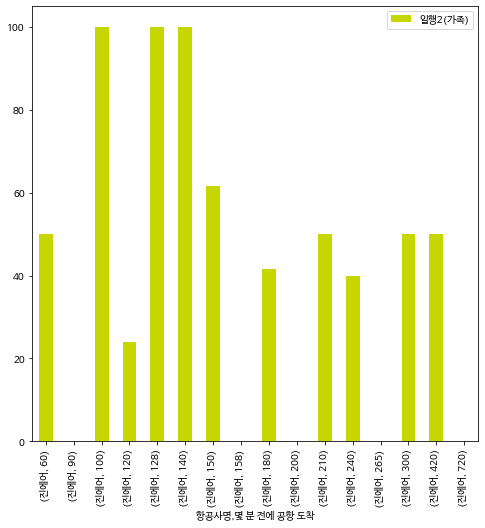

In [1661]:
df4_min_jin.plot.bar(figsize=(8, 8),color='#c6d601')

#저장 및 다운로드 기능
#plt.savefig("1.7. 몇 분 전에 공항 도착 분석(진에어).png")
#files.download("1.7. 몇 분 전에 공항 도착 분석(진에어).png") 

### 1.8. 비행목적 분석

In [1662]:
df3_purpose = df3.groupby(['항공사명', '비행목적']).mean().round(decimals = 2)
df3_purpose

#저장 및 다운로드 기능
#df3_purpose.to_csv('1.8. 비행목적 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.8. 비행목적 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 비행목적                                                           
제주항공 교육(어학프로그램, 연수 등)    37.04     0.00     0.00      59.26     7.41
     대학진학을 위한 면접        100.00     0.00     0.00       0.00     0.00
     미용, 건강 및 치료         42.86    14.29    14.29       0.00    28.57
     본가방문                60.00    20.00     0.00       0.00    20.00
     비즈니스 또는 업무          63.64     5.05     2.02      25.25     3.03
     쇼핑                  27.78    27.78     9.26       1.85    35.19
     여가/위락/개별휴가          11.45    45.89    12.22       6.07    26.90
     친구, 친지 방문           61.54    23.93     5.98       0.85     7.69
진에어  교육(어학프로그램, 연수 등)    75.00     0.00     0.00      25.00     0.00
     미용, 건강 및 치료        100.00     0.00     0.00       0.00     0.00
     비즈니스 또는 업무          58.82     5.88     5.88      29.41     0.00
     쇼핑                   9.52    42.86     9.52       0.00    38.10
     여가/위락/개별휴가          20.16    44.35    16.13       0.81    25.00
     친구, 친지 방문           73.33    20.00     0.00       0.00     6.67

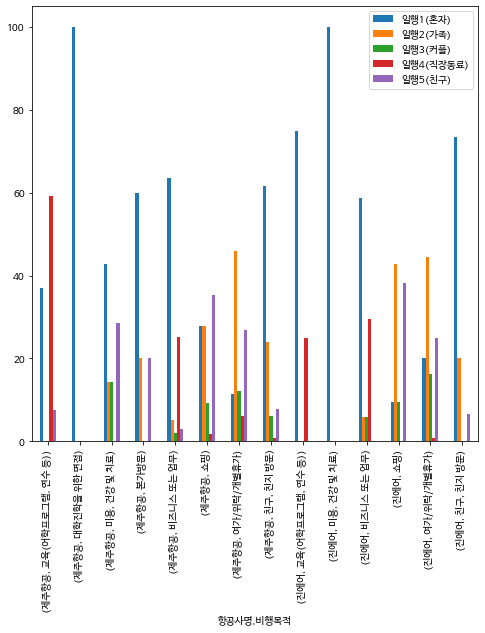

In [1663]:
df3_purpose.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.8. 비행목적 분석.png")
#files.download("1.8. 비행목적 분석.png") 

### 1.9. 여행형태 분석

In [1664]:
df3_form = df3.groupby(['항공사명', '여행형태']).mean().round(decimals = 2)
df3_form

#저장 및 다운로드 기능
#df3_form.to_csv('1.9. 여행형태 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.9. 여행형태 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행형태                                                               
제주항공 개별 여행                   32.42    31.79    10.11       4.63    22.63
     패키지 여행(Package tour)     1.21    52.19    11.80      11.80    25.87
진에어  개별 여행                   35.17    35.17     9.66       2.07    21.38
     패키지 여행(Package tour)     5.26    44.74    23.68      10.53    23.68

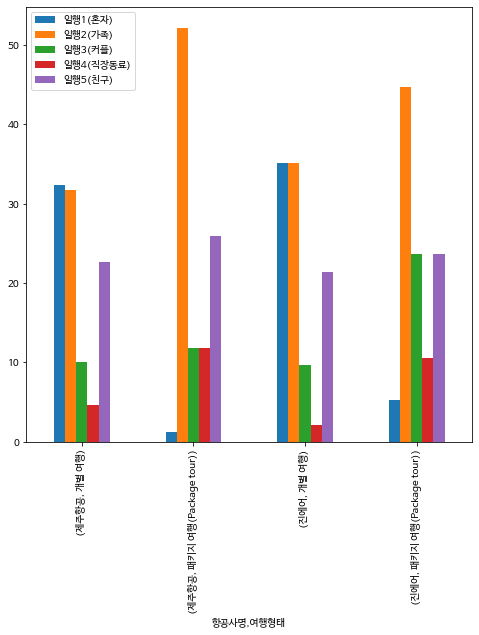

In [1665]:
df3_form.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.9. 여행형태 분석.png")
#files.download("1.9. 여행형태 분석.png") 

### 1.10. 여행일수 분석

In [1666]:
df3_days = df3.groupby(['항공사명', '여행일수']).mean().round(decimals = 2)
df3_days

#저장 및 다운로드 기능
#df3_days.to_csv('1.10. 여행일수 분석.csv', encoding = 'utf-8-sig') 
#files.download('1.10. 여행일수 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행일수                                                           
제주항공 1개월 이내(1일 ~ 30일)    17.72    41.27    10.81       7.74    24.63
     1개월 이상(31일 이상)      82.35     0.00    11.76       2.94     2.94
     이민/여행 등 편도 일정       78.57    14.29     7.14       0.00     0.00
진에어  1개월 이내(1일 ~ 30일)    27.68    37.85    12.43       3.95    22.60
     1개월 이상(31일 이상)      66.67    16.67    16.67       0.00     0.00

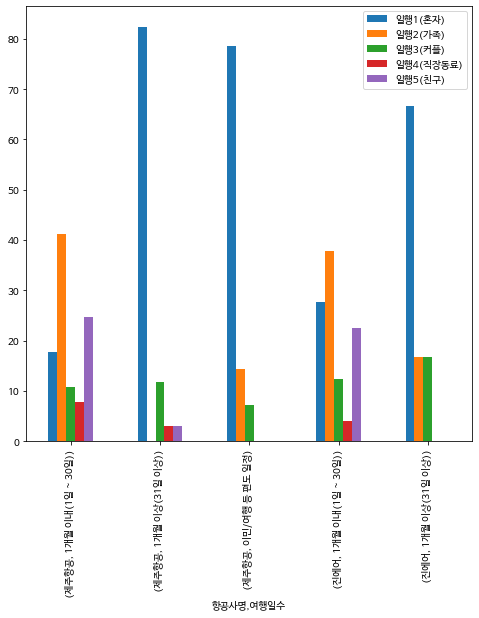

In [1667]:
df3_days.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("1.10. 여행일수 분석.png")
#files.download("1.10. 여행일수 분석.png") 

# 2. 진에어 분석

In [1668]:
df3_jin = df3.loc[df3['항공사명']=='진에어']
#df3_jin

### 2.1. 내/외국인 분석

In [1669]:
df3_jin_nat = df3_jin.loc[(df3_jin['내/외국인'] == '내국인')|(df3_jin['내/외국인'] == '외국인')]
df3_jin_nat = df3_jin_nat.groupby(['항공사명', '내/외국인']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_nat

#저장 및 다운로드 기능
#df3_jin_nat.to_csv('2.1. 내/외국인 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.1. 내/외국인 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 내/외국인                                               
진에어  내국인      22.58    51.61    19.35       3.23     9.68
     외국인      28.00    28.00    24.00       0.00    20.00

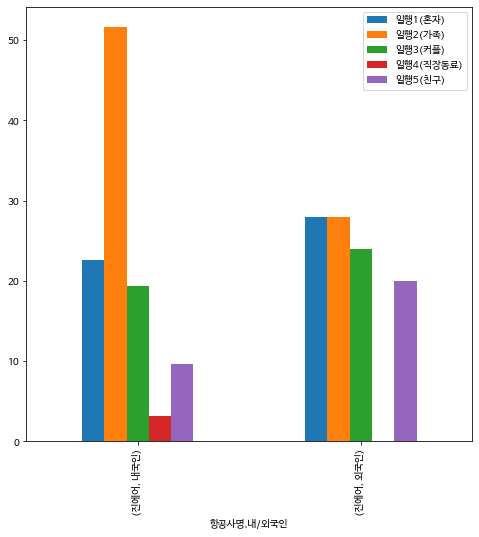

In [1670]:
df3_jin_nat.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.1. 내/외국인 분석.png")
#files.download("2.1. 내/외국인 분석.png") 

### 2.2. 성별 분석

In [1671]:
df3_jin_sex = df3_jin.loc[(df3_jin['성별'] == 'F')|(df3_jin['성별'] == 'M')]
df3_jin_sex = df3_jin_sex.groupby(['항공사명', '성별']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_sex

#저장 및 다운로드 기능
#df3_jin_sex.to_csv('2.2. 성별 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.2. 성별 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 성별                                               
진에어  F     26.47    38.24    10.29       1.47    23.53
     M     35.48    24.19    19.35       9.68    19.35

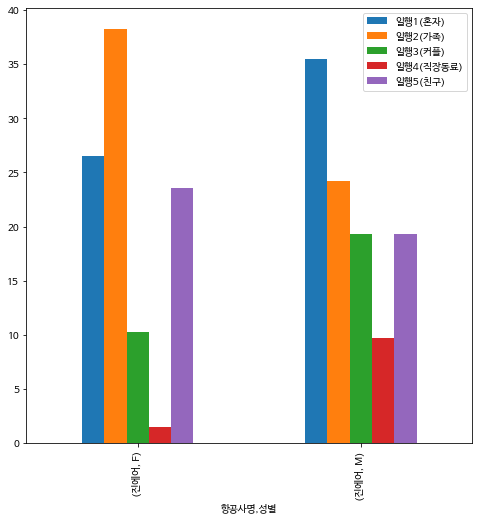

In [1672]:
df3_jin_sex.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.2. 성별 분석.png")
#files.download("2.2. 성별 분석.png") 

### 2.3. 나이대 분석

In [1673]:
df3_jin_age = df3_jin.loc[(df3['나이대'] == '10대')|(df3['나이대'] == '20대')|(df3['나이대'] == '30대')|(df3['나이대'] == '40대')|(df3['나이대'] == '50대')|(df3['나이대'] == '60대')|(df3['나이대'] == '70대 이상')]
df3_jin_age = df3_jin_age.groupby(['항공사명', '나이대']).mean().iloc[:, [1]]
df3_jin_age

#저장 및 다운로드 기능
#df3_jin_age.to_csv('2.3. 나이대 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.3. 나이대 분석.csv')

일행2(가족)
항공사명 나이대              
진에어  10대     42.857143
     20대     16.129032
     30대     14.285714
     40대     50.000000
     50대     52.380952
     60대     22.727273
     70대 이상  50.000000

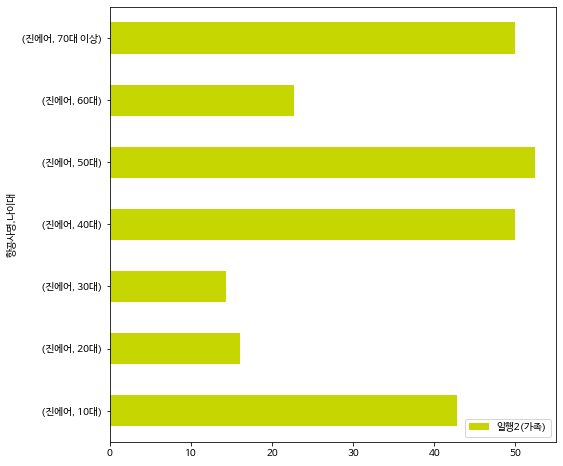

In [1674]:
df3_jin_age.plot.barh(figsize=(8, 8),color='#c6d601')

#저장 및 다운로드 기능
#plt.savefig("2.3. 나이대 분석.png")
#files.download("2.3. 나이대 분석.png") 

### 2.4. 도착국가 분석

In [1675]:
df3_jin_country = df3_jin.groupby(['항공사명', '도착국가']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_country

#저장 및 다운로드 기능
#df3_jin_country.to_csv('2.4. 도착국가 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.4. 도착국가 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착국가                                                
진에어  중국       10.00    50.00     0.00      10.00    30.00
     필리핀      50.00    50.00     0.00       0.00     0.00
     말레이시아    42.86    42.86    28.57       0.00     0.00
     베트남       9.09    40.91    40.91       9.09    13.64
     일본       33.07    35.43     7.87       3.15    22.83
     태국       25.00    33.33    16.67       0.00    33.33
     싱가포르      0.00     0.00     0.00       0.00   100.00

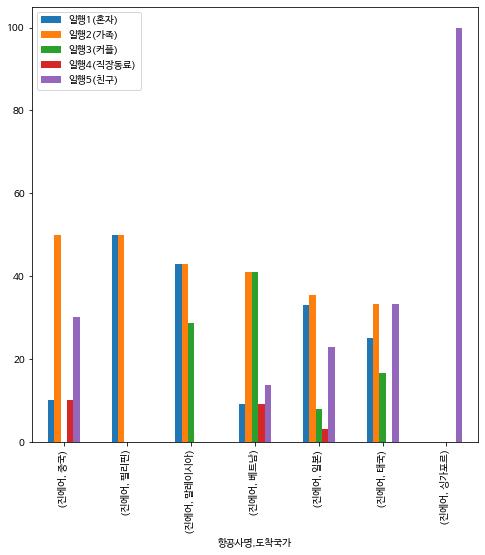

In [1676]:
df3_jin_country.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.4. 도착국가 분석.png")
#files.download("2.4. 도착국가 분석.png") 

### 2.5. 도착공항 분석

In [1677]:
df3_jin_port = df3_jin.groupby(['항공사명', '도착공항']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_port

#저장 및 다운로드 기능
#df3_jin_port.to_csv('2.5. 도착공항 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.5. 도착공항 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착공항                                                       
진에어  CEB_세부           0.00   100.00     0.00       0.00     0.00
     HKT_푸켓           0.00   100.00     0.00       0.00     0.00
     KLO_칼리보          0.00   100.00     0.00       0.00     0.00
     PVG_푸동           0.00    55.56     0.00      11.11    33.33
     KKJ_키타큐슈        15.00    55.00    10.00       0.00    30.00
     ITM_이따미         25.00    50.00     0.00       0.00    25.00
     BKI_코타키나발루      42.86    42.86    28.57       0.00     0.00
     DAD_다낭           9.09    40.91    40.91       9.09    13.64
     KIX_오사카         32.14    35.71     1.79       7.14    25.00
     NRT_동경(나리타)     47.37    31.58     5.26       0.00    15.79
     BKK_방콕(수완나품)    22.22    22.22    22.22       0.00    44.44
     FUK_후쿠오카        41.67    16.67    25.00       0.00    16.67
     CRK_클라크 필드     100.00     0.00     0.00       0.00     0.00
     DMK_돈무앙        100.00     0.00     0.00       0.00     0.00
     MFM_마카오        100.00     0.00     0.00       0.00     0.00
     SIN_싱가폴          0.00     0.00     0.00       0.00   100.00

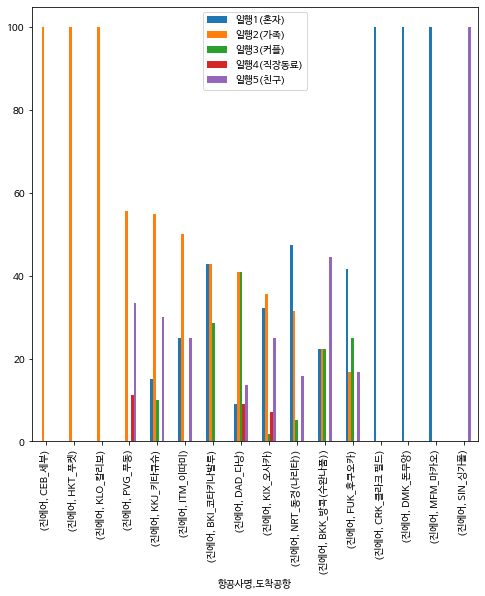

In [1678]:
df3_jin_port.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.5. 도착공항 분석.png")
#files.download("2.5. 도착공항 분석.png") 

### 2.6. 몇 분 전에 공항 도착 분석

In [1679]:
#진에어를 이용하는 승객들은 평균적으로 몇 분 전에 공항에 도착하는가 계산
df4_jin = df4.loc[df4['항공사명']=='진에어']
df4_jin = df4_jin.loc[df4_jin["몇 분 전에 공항 도착"] > 0] #앞서 0은 결측 데이터이었기 때문에 0 초과하는 값들만 이용
df4_jin_min_mean = df4_jin["몇 분 전에 공항 도착"].mean().round(decimals = 2)
df4_jin_min_mean

180.43

In [1680]:
df4_jin_min = df4_jin.groupby(['항공사명', '몇 분 전에 공항 도착']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df4_jin_min

#저장 및 다운로드 기능
#df4_jin_min.to_csv('2.6. 몇 분 전에 공항 도착 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.6. 몇 분 전에 공항 도착 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 몇 분 전에 공항 도착                                               
진에어  100              0.00   100.00     0.00       0.00     0.00
     128              0.00   100.00     0.00       0.00     0.00
     140              0.00   100.00     0.00       0.00     0.00
     150             15.38    61.54    23.08       0.00    15.38
     60               0.00    50.00    50.00       0.00     0.00
     210              0.00    50.00    50.00       0.00     0.00
     300             50.00    50.00     0.00       0.00     0.00
     420             25.00    50.00    25.00       0.00     0.00
     180             16.67    41.67    20.83       8.33    20.83
     240             20.00    40.00    20.00      10.00    10.00
     120             40.00    24.00     8.00       4.00    36.00
     90             100.00     0.00     0.00       0.00     0.00
     158              0.00     0.00     0.00       0.00   100.00
     200              0.00     0.00     0.00       0.00   100.00
     265              0.00     0.00   100.00       0.00     0.00
     720            100.00     0.00     0.00       0.00     0.00

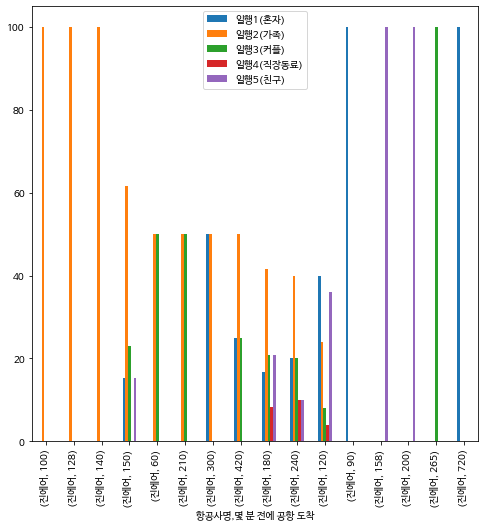

In [1681]:
df4_jin_min.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.6. 몇 분 전에 공항 도착 분석.png")
#files.download("2.6. 몇 분 전에 공항 도착 분석.png") 

### 2.7. 비행목적 분석

In [1682]:
df3_jin_purpose = df3_jin.groupby(['항공사명', '비행목적']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_purpose

#저장 및 다운로드 기능
#df3_jin_purpose.to_csv('2.7. 비행목적 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.7. 비행목적 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 비행목적                                                           
진에어  여가/위락/개별휴가          20.16    44.35    16.13       0.81    25.00
     쇼핑                   9.52    42.86     9.52       0.00    38.10
     친구, 친지 방문           73.33    20.00     0.00       0.00     6.67
     비즈니스 또는 업무          58.82     5.88     5.88      29.41     0.00
     교육(어학프로그램, 연수 등)    75.00     0.00     0.00      25.00     0.00
     미용, 건강 및 치료        100.00     0.00     0.00       0.00     0.00

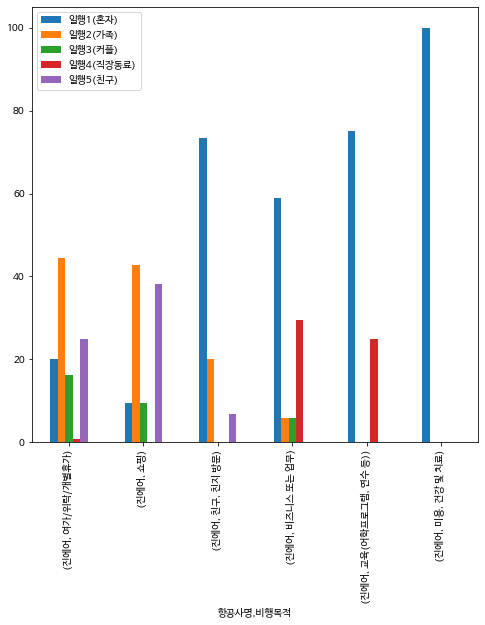

In [1683]:
df3_jin_purpose.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.7. 비행목적 분석.png")
#files.download("2.7. 비행목적 분석.png") 

### 2.8. 비행형태 분석

In [1684]:
df3_jin_form = df3_jin.groupby(['항공사명', '여행형태']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_form

#저장 및 다운로드 기능
#df3_jin_form.to_csv('2.8. 비행형태 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.8. 비행형태 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행형태                                                               
진에어  패키지 여행(Package tour)     5.26    44.74    23.68      10.53    23.68
     개별 여행                   35.17    35.17     9.66       2.07    21.38

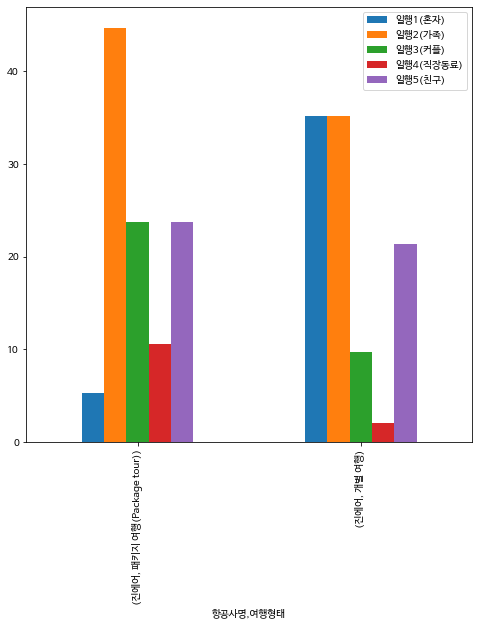

In [1685]:
df3_jin_form.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.8. 비행형태 분석.png")
#files.download("2.8. 비행형태 분석.png") 

### 2.9. 여행일수 분석

In [1686]:
df3_jin_days = df3_jin.groupby(['항공사명', '여행일수']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_days

#저장 및 다운로드 기능
#df3_jin_days.to_csv('2.9. 여행일수 분석.csv', encoding = 'utf-8-sig') 
#files.download('2.9. 여행일수 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행일수                                                           
진에어  1개월 이내(1일 ~ 30일)    27.68    37.85    12.43       3.95     22.6
     1개월 이상(31일 이상)      66.67    16.67    16.67       0.00      0.0

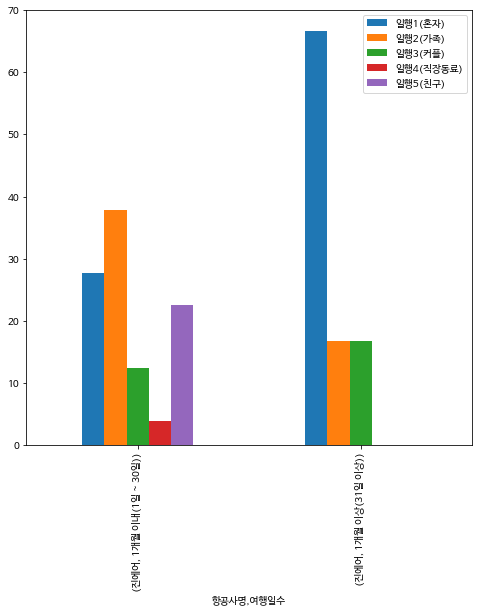

In [1687]:
df3_jin_days.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("2.9. 여행일수 분석.png")
#files.download("2.9. 여행일수 분석.png") 

# 3. 제주항공 분석

In [1688]:
df3_jeju = df3.loc[df3['항공사명']=='제주항공']
#df3_jeju

### 3.1. 내/외국인 분석

In [1689]:
df3_jeju_nat = df3_jeju.loc[(df3_jeju['내/외국인'] == '내국인')|(df3_jeju['내/외국인'] == '외국인')]
df3_jeju_nat = df3_jeju_nat.groupby(['항공사명', '내/외국인']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_nat

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.1. 내/외국인 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.1. 내/외국인 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 내/외국인                                               
제주항공 내국인      11.16    46.43     8.93        5.8    29.46
     외국인      35.06    15.58     7.79        1.3    40.26

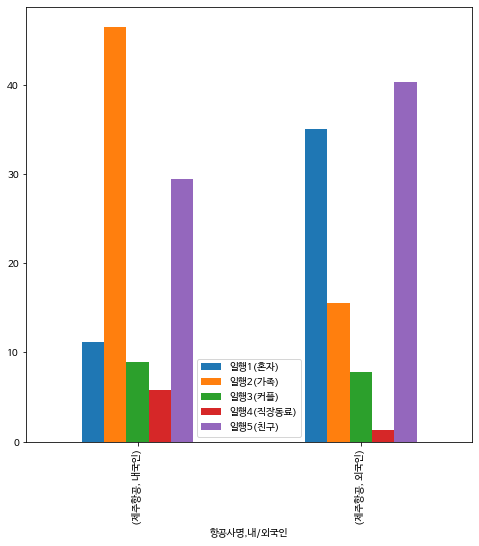

In [1690]:
df3_jeju_nat.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.1. 내/외국인 분석.png")
#files.download("3.1. 내/외국인 분석.png") 

### 3.2. 성별 분석

In [1691]:
df3_jeju_sex = df3_jeju.loc[(df3_jeju['성별'] == 'F')|(df3_jeju['성별'] == 'M')]
df3_jeju_sex = df3_jeju_sex.groupby(['항공사명', '성별']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_sex

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.2. 성별 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.2. 성별 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 성별                                               
제주항공 F     14.89    41.29     8.46       4.57    32.49
     M     25.04    35.45     8.64      11.29    19.93

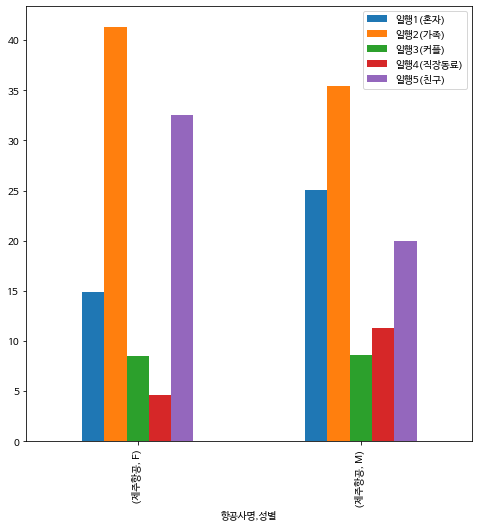

In [1692]:
df3_jeju_sex.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.2. 성별 분석.png")
#files.download("3.2. 성별 분석.png") 

### 3.3. 나이대 분석

In [1693]:
df3_jeju_age = df3_jeju.loc[(df3['나이대'] == '10대')|(df3['나이대'] == '20대')|(df3['나이대'] == '30대')|(df3['나이대'] == '40대')|(df3['나이대'] == '50대')|(df3['나이대'] == '60대')|(df3['나이대'] == '70대 이상')]
df3_jeju_age = df3_jeju_age.groupby(['항공사명', '나이대']).mean().iloc[:, [1]]
df3_jin_age.round(decimals = 2)
df3_jeju_age

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.3. 나이대 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.3. 나이대 분석.csv')

일행2(가족)
항공사명 나이대              
제주항공 10대     78.688525
     20대     25.000000
     30대     35.849057
     40대     42.962963
     50대     32.974910
     60대     43.478261
     70대 이상  56.000000

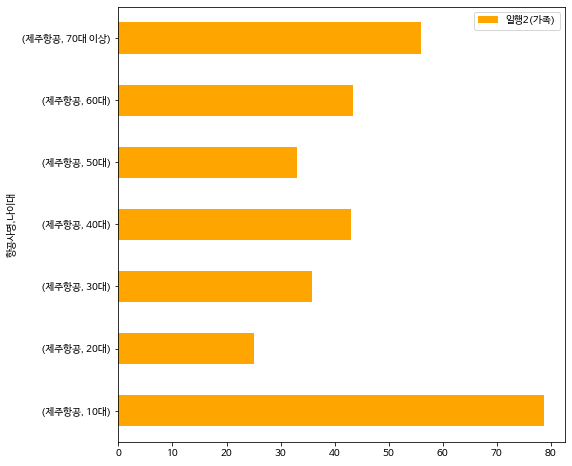

In [1694]:
df3_jeju_age.plot.barh(figsize=(8, 8),color='orange')

#저장 및 다운로드 기능
#plt.savefig("3.3. 나이대 분석.png")
#files.download("3.3. 나이대 분석.png") 

### 3.4. 도착국가 분석

In [1695]:
df3_jeju_country = df3_jeju.groupby(['항공사명', '도착국가']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_country

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.4. 도착국가 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.4. 도착국가 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착국가                                                
제주항공 몽골        0.00   100.00     0.00       0.00     0.00
     홍콩       20.00    53.33     6.67       0.00    20.00
     필리핀      17.81    52.05     5.48       9.59    13.70
     베트남       3.72    51.70    11.15      10.84    24.15
     대만        8.84    43.76    15.19       6.12    30.16
     태국       17.99    41.73    16.55       9.35    18.71
     말레이시아     9.09    40.91     9.09       0.00    40.91
     러시아      41.67    33.33     4.17      12.50     4.17
     일본       38.77    31.72     7.27       4.41    18.94
     싱가포르     19.05    23.81     9.52      19.05    33.33
     마카오      33.33    16.67     0.00       0.00    50.00
     중국       37.50    16.25     5.00       5.00    37.50
     라오스       0.00     0.00     0.00     100.00     0.00
     미국        0.00     0.00   100.00       0.00     0.00

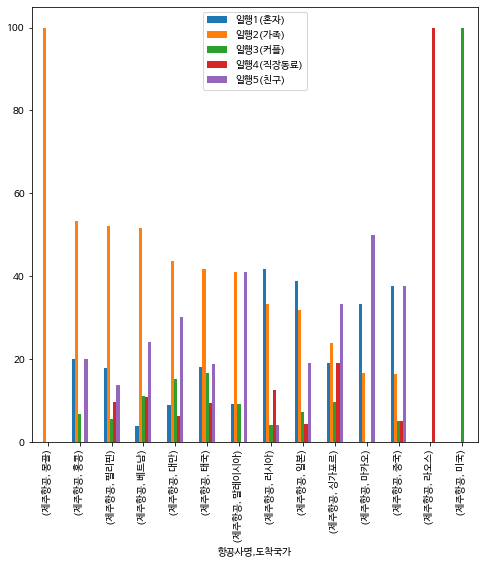

In [1696]:
df3_jeju_country.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.4. 도착국가 분석.png")
#files.download("3.4. 도착국가 분석.png") 

### 3.5. 도착공항 분석

In [1697]:
df3_jeju_port = df3_jeju.groupby(['항공사명', '도착공항']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_port

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.5. 도착공항 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.5. 도착공항 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착공항                                                          
제주항공 CAN_광저우             0.00   100.00     0.00       0.00     0.00
     ULN_울란바토르(칭기즈칸)     0.00   100.00     0.00       0.00     0.00
     CEB_세부             11.11    57.14     7.94       7.94    15.87
     DAD_다낭              3.74    52.02    10.90      10.90    23.99
     BKI_코타키나발루          5.56    50.00     5.56       0.00    38.89
     ITM_이따미            19.05    47.62     4.76       0.00    23.81
     TPE_대북(타이완타오위안)     7.91    45.45    19.37       5.53    25.69
     BKK_방콕(수완나품)       15.62    43.75    14.06      10.16    20.31
     CTS_삿보로(치토세)       42.86    42.86     0.00       0.00    14.29
     TSA_쑹산(타이베이)        8.52    42.61     9.09       7.39    37.50
     MFM_마카오            22.73    40.91     0.00       4.55    31.82
     OKA_오끼나와(나하)       20.00    40.00    40.00       0.00    20.00
     FUK_후쿠오카           32.52    38.21    11.38       4.07    17.07
     FSZ_시즈오카           50.00    37.50     0.00       0.00    12.50
     VVO_블라디보스톡         41.67    33.33     4.17      12.50     4.17
     HND_하네다            55.56    33.33    11.11       0.00     0.00
     NGO_나고야(주부)        33.33    33.33     0.00       0.00    33.33
     KIX_오사카            31.65    30.94     4.32       5.76    28.78
     KHH_카오슝            30.77    30.77    15.38       0.00    23.08
     YNJ_연길(차오양촨진)      31.25    25.00     9.38       6.25    28.12
     SIN_싱가폴            19.05    23.81     9.52      19.05    33.33
     NRT_동경(나리타)        52.00    23.20     6.40       5.60    12.00
     NKM_나고야 공항         70.00    20.00    10.00       0.00     0.00
     HKG_홍콩             50.00    16.67    16.67       0.00    16.67
     CNX_치앙마이           46.15    15.38    38.46       0.00     7.69
     DYG_장가계(대용)         0.00    11.11    11.11      11.11    66.67
     WEH_웨이하이           72.73     9.09     0.00       0.00    18.18
     MNL_마닐라(니노이아키노)    54.55     9.09     0.00      18.18     9.09
     YNT_연대(옌타이펑라이)     53.33     6.67     0.00       0.00    40.00
     TAO_청도(칭다오류팅)       0.00     0.00     0.00       0.00   100.00
     SPN_사이판             0.00     0.00   100.00       0.00     0.00
     VTE_비엔티안            0.00     0.00     0.00     100.00     0.00
     PEK_북경              0.00     0.00     0.00       0.00   100.00
     MYJ_마즈야마          100.00     0.00     0.00       0.00     0.00
     KUL_쿠알라룸푸르         25.00     0.00    25.00       0.00    50.00

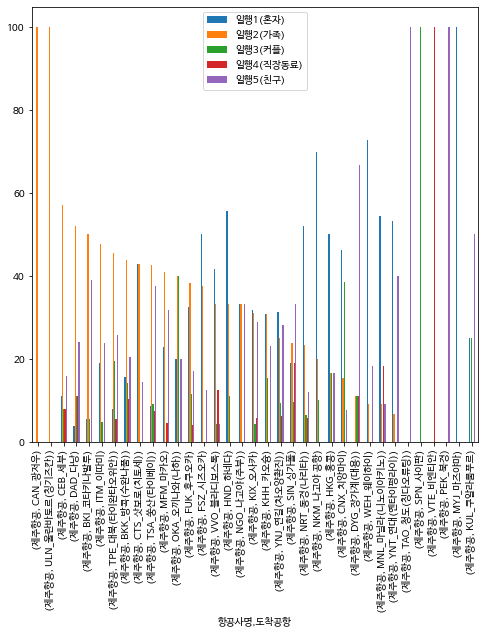

In [1698]:
df3_jeju_port.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.5. 도착공항 분석.png")
#files.download("3.5. 도착공항 분석.png") 

### 3.6. 몇 분 전에 공항 도착 분석

In [1699]:
#제주항공을 이용하는 승객들은 평균적으로 몇 분 전에 공항에 도착하는가 계산
df4_jeju = df4.loc[df4['항공사명']=='제주항공']
df4_jeju = df4_jeju.loc[df4_jeju["몇 분 전에 공항 도착"] > 0] #앞서 0은 결측 데이터이었기 때문에 0 초과하는 값들만 이용
df4_jeju_min_mean = df4_jeju["몇 분 전에 공항 도착"].mean().round(decimals = 2)
df4_jeju_min_mean

140.77

In [1700]:
df4_jeju_min = df4_jeju.groupby(['항공사명', '몇 분 전에 공항 도착']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df4_jeju_min

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.6. 몇 분 전에 공항 도착 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.6. 몇 분 전에 공항 도착 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 몇 분 전에 공항 도착                                               
제주항공 220              0.00   100.00     0.00       0.00     0.00
     290              0.00   100.00     0.00       0.00     0.00
     152              0.00   100.00     0.00       0.00     0.00
     158              0.00   100.00     0.00       0.00     0.00
     21               0.00   100.00     0.00       0.00     0.00
     138              0.00   100.00     0.00       0.00     0.00
     135              0.00   100.00     0.00       0.00     0.00
     360              0.00   100.00     0.00       0.00     0.00
     450              0.00   100.00     0.00       0.00     0.00
     108              0.00    75.00     0.00       0.00    25.00
     20               0.00    75.00     0.00       0.00    25.00
     128              0.00    70.00     0.00       0.00    30.00
     140              7.69    69.23     7.69       7.69     7.69
     250             33.33    66.67     0.00       0.00     0.00
     190              0.00    66.67     0.00       0.00    33.33
     40               0.00    66.67     0.00      33.33    33.33
     30               0.00    60.00    20.00      20.00     0.00
     70              28.57    57.14     0.00      14.29     0.00
     130              5.13    56.41     7.69       5.13    25.64
     160             13.04    52.17     4.35       4.35    30.43
     170             12.50    50.00    12.50       0.00    25.00
     150             11.43    48.00    15.43       6.86    21.71
     100             21.43    46.43     3.57       7.14    25.00
     120             11.97    45.38    12.18       8.82    23.95
     200             10.00    45.00     0.00      15.00    35.00
     60              12.50    45.00    15.00       7.50    25.00
     210              0.00    44.44    44.44       0.00    22.22
     180             16.84    42.11    13.16       8.95    20.53
     300             35.29    35.29    11.76       5.88    11.76
     240             22.58    32.26     9.68      16.13    25.81
     90              32.14    32.14     5.36       7.14    23.21
     110             14.29    28.57     0.00       0.00    42.86
     80              33.33    16.67     0.00       0.00    50.00
     308              0.00     0.00   100.00       0.00     0.00
     480            100.00     0.00     0.00       0.00     0.00
     45               0.00     0.00     0.00       0.00   100.00
     400              0.00     0.00     0.00       0.00   100.00
     50              20.00     0.00    20.00      20.00    40.00
     350            100.00     0.00     0.00       0.00     0.00
     320              0.00     0.00     0.00       0.00   100.00
     208              0.00     0.00     0.00       0.00   100.00
     95               0.00     0.00     0.00       0.00   100.00
     98               0.00     0.00     0.00       0.00   100.00
     270              0.00     0.00   100.00       0.00     0.00
     260              0.00     0.00     0.00       0.00   100.00
     185            100.00     0.00     0.00       0.00     0.00
     230              0.00     0.00     0.00     100.00     0.00
     930            100.00     0.00     0.00       0.00     0.00

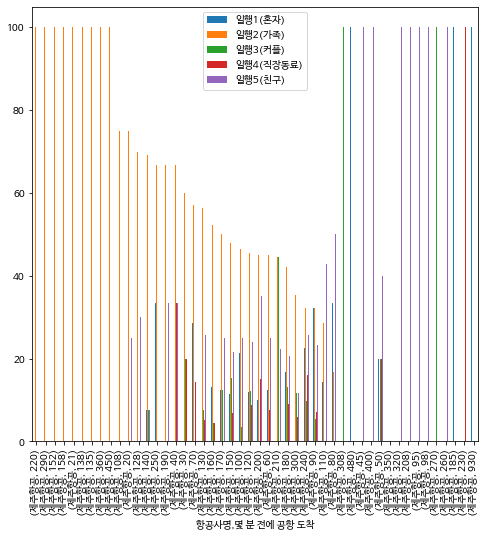

In [1701]:
df4_jeju_min.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.6. 몇 분 전에 공항 도착 분석.png")
#files.download("3.6. 몇 분 전에 공항 도착 분석.png") 

### 3.7. 비행목적 분석

In [1702]:
df3_jeju_purpose = df3_jeju.groupby(['항공사명', '비행목적']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_purpose

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.7. 비행목적 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.7. 비행목적 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 비행목적                                                           
제주항공 여가/위락/개별휴가          11.45    45.89    12.22       6.07    26.90
     쇼핑                  27.78    27.78     9.26       1.85    35.19
     친구, 친지 방문           61.54    23.93     5.98       0.85     7.69
     본가방문                60.00    20.00     0.00       0.00    20.00
     미용, 건강 및 치료         42.86    14.29    14.29       0.00    28.57
     비즈니스 또는 업무          63.64     5.05     2.02      25.25     3.03
     교육(어학프로그램, 연수 등)    37.04     0.00     0.00      59.26     7.41
     대학진학을 위한 면접        100.00     0.00     0.00       0.00     0.00

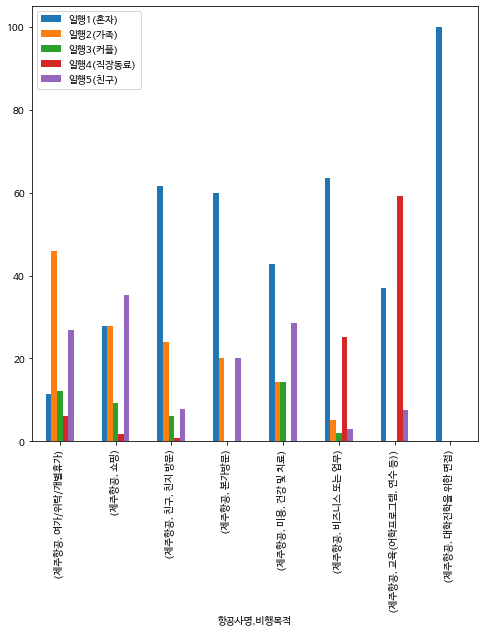

In [1703]:
df3_jeju_purpose.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.7. 비행목적 분석.png")
#files.download("3.7. 비행목적 분석.png") 

### 3.8. 여행형태 분석

In [1704]:
df3_jeju_form = df3_jeju.groupby(['항공사명', '여행형태']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_form

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.8. 여행형태 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.8. 여행형태 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행형태                                                               
제주항공 패키지 여행(Package tour)     1.21    52.19    11.80      11.80    25.87
     개별 여행                   32.42    31.79    10.11       4.63    22.63

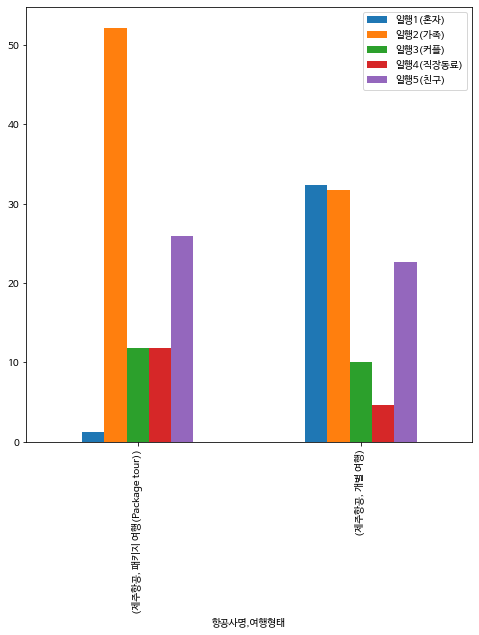

In [1705]:
df3_jeju_form.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.8. 여행형태 분석.png")
#files.download("3.8. 여행형태 분석.png") 

### 3.9. 여행일수 분석

In [1706]:
df3_jeju_days = df3_jeju.groupby(['항공사명', '여행일수']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_days

#저장 및 다운로드 기능
#df3_jin_days.to_csv('3.9. 여행일수 분석.csv', encoding = 'utf-8-sig') 
#files.download('3.9. 여행일수 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행일수                                                           
제주항공 1개월 이내(1일 ~ 30일)    17.72    41.27    10.81       7.74    24.63
     이민/여행 등 편도 일정       78.57    14.29     7.14       0.00     0.00
     1개월 이상(31일 이상)      82.35     0.00    11.76       2.94     2.94

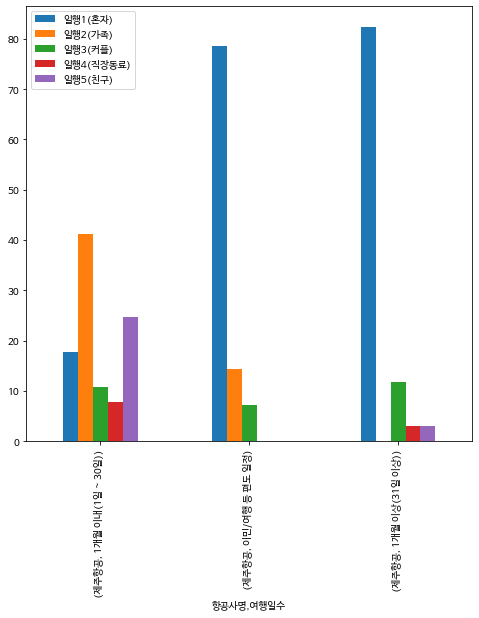

In [1707]:
df3_jeju_days.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("3.9. 여행일수 분석.png")
#files.download("3.9. 여행일수 분석.png") 

# 4. 개별분석을 다시 통합해서 분석

### 4.1. 내/외국인 분석

In [1708]:
df3_nat_data = [df3_jin_nat, df3_jeju_nat]
df3_nat = pd.concat(df3_nat_data).round(decimals = 2)
df3_nat

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.1. 내/외국인 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.1. 내/외국인 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 내/외국인                                               
진에어  내국인      22.58    51.61    19.35       3.23     9.68
     외국인      28.00    28.00    24.00       0.00    20.00
제주항공 내국인      11.16    46.43     8.93       5.80    29.46
     외국인      35.06    15.58     7.79       1.30    40.26

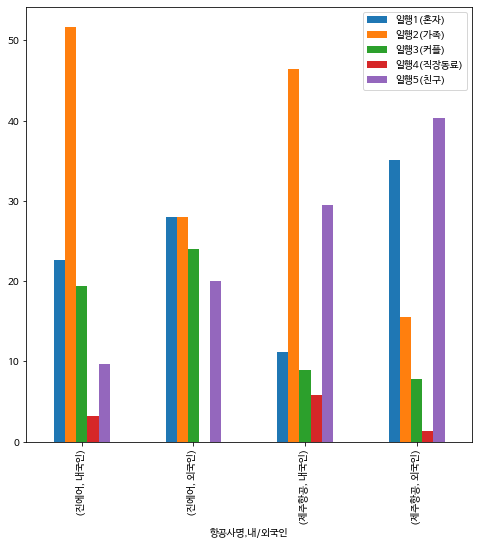

In [1709]:
df3_nat.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.1. 내/외국인 분석.png")
#files.download("4.1. 내/외국인 분석.png") 

### 4.2. 성별 분석

In [1710]:
df3_sex_data = [df3_jin_sex, df3_jeju_sex]
df3_sex = pd.concat(df3_sex_data).round(decimals = 2)
df3_sex

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.2. 성별 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.2. 성별 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 성별                                               
진에어  F     26.47    38.24    10.29       1.47    23.53
     M     35.48    24.19    19.35       9.68    19.35
제주항공 F     14.89    41.29     8.46       4.57    32.49
     M     25.04    35.45     8.64      11.29    19.93

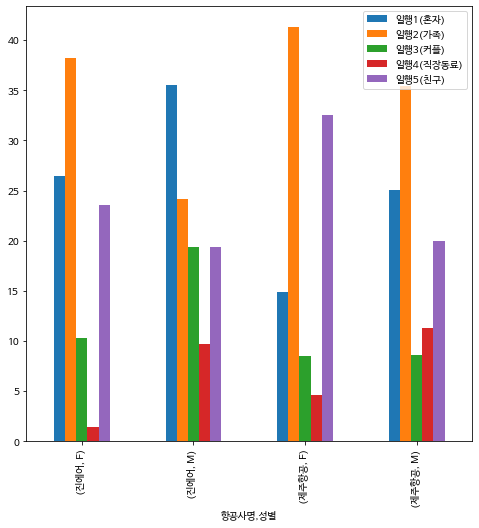

In [1711]:
df3_sex.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.2. 성별 분석.png")
#files.download("4.2. 성별 분석.png") 

### 4.3. 나이대 분석

In [1712]:
df3_age_data = [df3_jin_age, df3_jeju_age]
df3_age = pd.concat(df3_age_data).round(decimals = 2)
df3_age

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.3. 나이대 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.3. 나이대 분석.csv')

일행2(가족)
항공사명 나이대            
진에어  10대       42.86
     20대       16.13
     30대       14.29
     40대       50.00
     50대       52.38
     60대       22.73
     70대 이상    50.00
제주항공 10대       78.69
     20대       25.00
     30대       35.85
     40대       42.96
     50대       32.97
     60대       43.48
     70대 이상    56.00

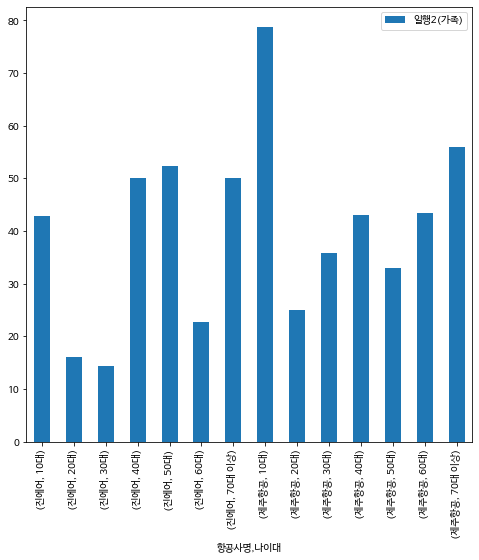

In [1713]:
df3_age.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.3. 나이대 분석.png")
#files.download("4.3. 나이대 분석.png") 

### 4.4. 도착국가 분석

In [1714]:
df3_country_data = [df3_jin_country, df3_jeju_country]
df3_country = pd.concat(df3_country_data).round(decimals = 2)
df3_country

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.4. 도착국가 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.4. 도착국가 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 도착국가                                                
진에어  중국       10.00    50.00     0.00      10.00    30.00
     필리핀      50.00    50.00     0.00       0.00     0.00
     말레이시아    42.86    42.86    28.57       0.00     0.00
     베트남       9.09    40.91    40.91       9.09    13.64
     일본       33.07    35.43     7.87       3.15    22.83
     태국       25.00    33.33    16.67       0.00    33.33
     싱가포르      0.00     0.00     0.00       0.00   100.00
제주항공 몽골        0.00   100.00     0.00       0.00     0.00
     홍콩       20.00    53.33     6.67       0.00    20.00
     필리핀      17.81    52.05     5.48       9.59    13.70
     베트남       3.72    51.70    11.15      10.84    24.15
     대만        8.84    43.76    15.19       6.12    30.16
     태국       17.99    41.73    16.55       9.35    18.71
     말레이시아     9.09    40.91     9.09       0.00    40.91
     러시아      41.67    33.33     4.17      12.50     4.17
     일본       38.77    31.72     7.27       4.41    18.94
     싱가포르     19.05    23.81     9.52      19.05    33.33
     마카오      33.33    16.67     0.00       0.00    50.00
     중국       37.50    16.25     5.00       5.00    37.50
     라오스       0.00     0.00     0.00     100.00     0.00
     미국        0.00     0.00   100.00       0.00     0.00

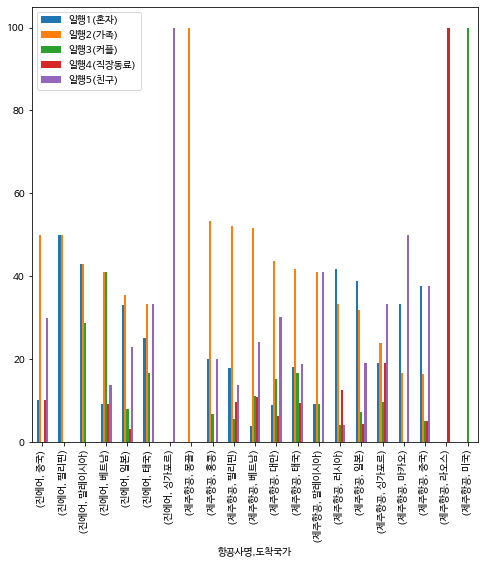

In [1715]:
df3_country.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.4. 도착국가 분석.png")
#files.download("4.4. 도착국가 분석.png") 

4.4.1. 같은 목적지로 향할때를 1대1 비교하기

In [1716]:
df3_jin['도착공항'].unique()

array(['FUK_후쿠오카', 'NRT_동경(나리타)', 'KIX_오사카', 'KKJ_키타큐슈', 'ITM_이따미',
       'BKK_방콕(수완나품)', 'DAD_다낭', 'CEB_세부', 'BKI_코타키나발루', 'HKT_푸켓',
       'KLO_칼리보', 'PVG_푸동', 'CRK_클라크 필드', 'SIN_싱가폴', 'DMK_돈무앙', 'MFM_마카오'],
      dtype=object)

In [1717]:
df3_jeju['도착공항'].unique()

array(['VTE_비엔티안', 'DAD_다낭', 'NRT_동경(나리타)', 'TPE_대북(타이완타오위안)',
       'BKI_코타키나발루', 'BKK_방콕(수완나품)', 'MFM_마카오', 'ITM_이따미', 'HND_하네다',
       'FUK_후쿠오카', 'KIX_오사카', 'CEB_세부', 'YNT_연대(옌타이펑라이)', 'NGO_나고야(주부)',
       'WEH_웨이하이', 'VVO_블라디보스톡', 'HKG_홍콩', 'TAO_청도(칭다오류팅)',
       'MNL_마닐라(니노이아키노)', 'KHH_카오슝', 'CTS_삿보로(치토세)', 'OKA_오끼나와(나하)',
       'TSA_쑹산(타이베이)', 'CAN_광저우', 'FSZ_시즈오카', 'CNX_치앙마이', 'SIN_싱가폴',
       'ULN_울란바토르(칭기즈칸)', 'MYJ_마즈야마', 'NKM_나고야 공항', 'YNJ_연길(차오양촨진)',
       'KUL_쿠알라룸푸르', 'PEK_북경', 'DYG_장가계(대용)', 'SPN_사이판'], dtype=object)

In [1718]:
#진에어와 제주항공의 공통 도착공항 선별
df3_port_intersection = list(set(df3_jin['도착공항'].unique()).intersection(df3_jeju['도착공항'].unique()))
df3_port_intersection

['ITM_이따미',
 'DAD_다낭',
 'BKI_코타키나발루',
 'SIN_싱가폴',
 'NRT_동경(나리타)',
 'MFM_마카오',
 'BKK_방콕(수완나품)',
 'CEB_세부',
 'KIX_오사카',
 'FUK_후쿠오카']

In [1719]:
df3_jin_port = df3_jin.loc[(df3_jin['도착공항'] == 'MFM_마카오')|(df3_jin['도착공항'] == 'KIX_오사카')|(df3_jin['도착공항'] == 'FUK_후쿠오카')|(df3_jin['도착공항'] == 'CEB_세부')|(df3_jin['도착공항'] == 'BKI_코타키나발루')|(df3_jin['도착공항'] == 'NRT_동경(나리타)')|(df3_jin['도착공항'] == 'BKK_방콕(수완나품)')|(df3_jin['도착공항'] == 'ITM_이따미')|(df3_jin['도착공항'] == 'DAD_다낭')|(df3_jin['도착공항'] == 'SIN_싱가폴')]
df3_jin_port = df3_jin_port.groupby(['항공사명', '도착공항']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jin_port = df3_jin_port.iloc[:, [1]]
df3_jin_port

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.4.1. 같은 목적지로 향할때를 1대1 비교하기(진에어).csv', encoding = 'utf-8-sig') 
#files.download('.csv')

일행2(가족)
항공사명 도착공항                 
진에어  CEB_세부         100.00
     ITM_이따미         50.00
     BKI_코타키나발루      42.86
     DAD_다낭          40.91
     KIX_오사카         35.71
     NRT_동경(나리타)     31.58
     BKK_방콕(수완나품)    22.22
     FUK_후쿠오카        16.67
     MFM_마카오          0.00
     SIN_싱가폴          0.00

In [1720]:
df3_jeju_port = df3_jeju.loc[(df3_jeju['도착공항'] == 'MFM_마카오')|(df3_jeju['도착공항'] == 'KIX_오사카')|(df3_jeju['도착공항'] == 'FUK_후쿠오카')|(df3_jeju['도착공항'] == 'CEB_세부')|(df3_jeju['도착공항'] == 'BKI_코타키나발루')|(df3_jeju['도착공항'] == 'NRT_동경(나리타)')|(df3_jeju['도착공항'] == 'BKK_방콕(수완나품)')|(df3_jeju['도착공항'] == 'ITM_이따미')|(df3_jeju['도착공항'] == 'DAD_다낭')|(df3_jeju['도착공항'] == 'SIN_싱가폴')]
df3_jeju_port = df3_jeju_port.groupby(['항공사명', '도착공항']).mean().sort_values('일행2(가족)',ascending=False).round(decimals = 2)
df3_jeju_port = df3_jeju_port.iloc[:, [1]]
df3_jeju_port

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.4.1. 같은 목적지로 향할때를 1대1 비교하기(제주항공).csv', encoding = 'utf-8-sig') 
#files.download('.csv')

일행2(가족)
항공사명 도착공항                 
제주항공 CEB_세부          57.14
     DAD_다낭          52.02
     BKI_코타키나발루      50.00
     ITM_이따미         47.62
     BKK_방콕(수완나품)    43.75
     MFM_마카오         40.91
     FUK_후쿠오카        38.21
     KIX_오사카         30.94
     SIN_싱가폴         23.81
     NRT_동경(나리타)     23.20

In [1721]:
df3_port_data = [df3_jin_port, df3_jeju_port]
df3_port = pd.concat(df3_port_data).round(decimals = 2)
df3_port

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.4.1. 같은 목적지로 향할때를 1대1 비교하기(통합).csv', encoding = 'utf-8-sig') 
#files.download('.csv')

일행2(가족)
항공사명 도착공항                 
진에어  CEB_세부         100.00
     ITM_이따미         50.00
     BKI_코타키나발루      42.86
     DAD_다낭          40.91
     KIX_오사카         35.71
     NRT_동경(나리타)     31.58
     BKK_방콕(수완나품)    22.22
     FUK_후쿠오카        16.67
     MFM_마카오          0.00
     SIN_싱가폴          0.00
제주항공 CEB_세부          57.14
     DAD_다낭          52.02
     BKI_코타키나발루      50.00
     ITM_이따미         47.62
     BKK_방콕(수완나품)    43.75
     MFM_마카오         40.91
     FUK_후쿠오카        38.21
     KIX_오사카         30.94
     SIN_싱가폴         23.81
     NRT_동경(나리타)     23.20

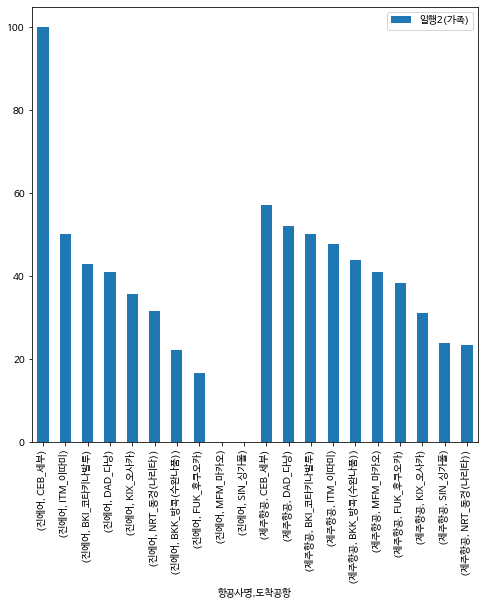

In [1722]:
df3_port.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.4.1. 같은 목적지로 향할때를 1대1 비교하기(통합).png")
#files.download("4.4.1. 같은 목적지로 향할때를 1대1 비교하기(통합).png") 

### 4.5. 몇 분 전에 공항 도착 분석

In [1723]:
df4_min_data = [df4_jin_min, df4_jeju_min]
df4_min = pd.concat(df4_min_data).round(decimals = 2)
df4_min = df4_min.iloc[:, [1]]
df4_min

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.5. 몇 분 전에 공항 도착 분석(통합).csv', encoding = 'utf-8-sig') 
#files.download('4.5. 몇 분 전에 공항 도착 분석(통합).csv')

일행2(가족)
항공사명 몇 분 전에 공항 도착         
진에어  100            100.00
     128            100.00
     140            100.00
     150             61.54
     60              50.00
...                    ...
제주항공 270              0.00
     260              0.00
     185              0.00
     230              0.00
     930              0.00

[64 rows x 1 columns]

In [1724]:
df4_jin_min.head(8).iloc[:, [1]].round(decimals = 2)

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.5. 몇 분 전에 공항 도착 분석(진에어).csv', encoding = 'utf-8-sig') 
#files.download('4.5. 몇 분 전에 공항 도착 분석(진에어).csv')

일행2(가족)
항공사명 몇 분 전에 공항 도착         
진에어  100            100.00
     128            100.00
     140            100.00
     150             61.54
     60              50.00
     210             50.00
     300             50.00
     420             50.00

In [1725]:
df4_jeju_min.head(21).iloc[:, [1]].round(decimals = 2)

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.5. 몇 분 전에 공항 도착 분석(제주항공).csv', encoding = 'utf-8-sig') 
#files.download('4.5. 몇 분 전에 공항 도착 분석(제주항공).csv')

일행2(가족)
항공사명 몇 분 전에 공항 도착         
제주항공 220            100.00
     290            100.00
     152            100.00
     158            100.00
     21             100.00
     138            100.00
     135            100.00
     360            100.00
     450            100.00
     108             75.00
     20              75.00
     128             70.00
     140             69.23
     250             66.67
     190             66.67
     40              66.67
     30              60.00
     70              57.14
     130             56.41
     160             52.17
     170             50.00

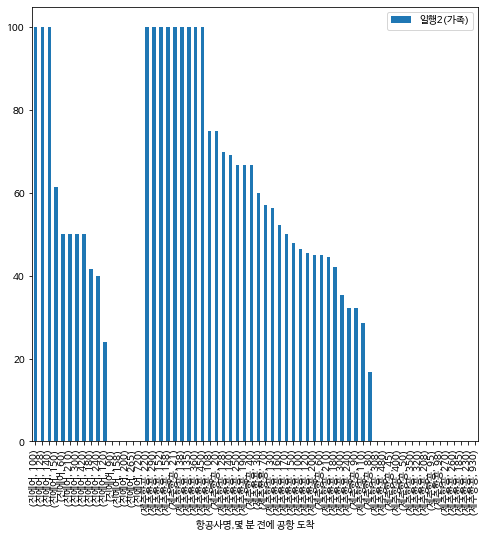

In [1726]:
df4_min.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.5. 몇 분 전에 공항 도착 분석(통합).png")
#files.download("4.5. 몇 분 전에 공항 도착 분석(통합).png") 

In [1727]:
#가족과 함께 제주항공을 이용하는 승객들이 몇 분 전에 공항에 도착하는지 평균값
df4_jeju_min_mean.round(decimals = 2)

140.77

In [1728]:
#가족과 함께 진에어를 이용하는 승객들이 몇 분 전에 공항에 도착하는지 평균값
df4_jin_min_mean.round(decimals = 2)

180.43

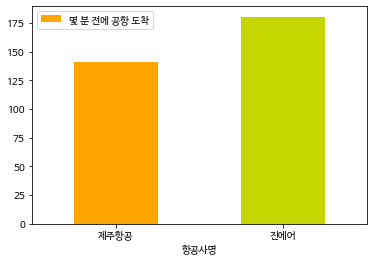

In [1729]:
df5 = pd.DataFrame({'항공사명':['제주항공', '진에어'], '몇 분 전에 공항 도착':[df4_jeju_min_mean, df4_jin_min_mean]})
ax = df5.plot.bar(x='항공사명', y='몇 분 전에 공항 도착', color=['orange','#c6d601'],rot=0)

#저장 및 다운로드 기능
#plt.savefig("4.5. 몇 분 전에 공항 도착 분석(평균값).png")
#files.download("4.5. 몇 분 전에 공항 도착 분석(평균값).png") 

In [1730]:
x = df4['몇 분 전에 공항 도착'].unique()
np.sort(x)

array([  0,  20,  21,  30,  40,  45,  50,  60,  70,  80,  90,  95,  98,
       100, 108, 110, 120, 128, 130, 135, 138, 140, 150, 152, 158, 160,
       170, 180, 185, 190, 200, 208, 210, 220, 230, 240, 250, 260, 265,
       270, 290, 300, 308, 320, 350, 360, 400, 420, 450, 480, 720, 930])

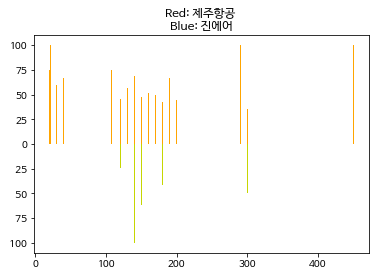

In [1731]:
# create data
A = np.array([75,  100,  60,  66.67,  0,  0,  45,  57.14,  16.67,  32.14,  0,  0,
       46.43, 75, 28.57, 45.38, 70, 56.41, 100, 100, 69.23, 48, 100, 100, 52.17,
       50, 42.11, 0, 66.67, 45, 0, 44.44, 100, 0, 32.26, 66.67, 0, 0,
       0, 100, 35.29, 0, 0, 0, 100, 0, 0, 100])
B = np.array([0,  0,  0,  0,  0,  0,  50,  0,  0,  0,  0,  0,
       100, 0, 0, 24, 100, 0, 0, 0, 100, 61.54, 0, 0, 0,
       0, 41.67, 0, 0, 0, 0, 50, 0, 0, 40, 0, 0, 0,
       0, 0, 50, 0, 0, 0, 0, 0, 50, 0])
X = np.array([20,  21,  30,  40,  45,  50,  60,  70,  80,  90,  95,  98,
       100, 108, 110, 120, 128, 130, 135, 138, 140, 150, 152, 158, 160,
       170, 180, 185, 190, 200, 208, 210, 220, 230, 240, 250, 260, 265,
       270, 290, 300, 308, 320, 350, 360, 400, 420, 450])
 
# plot the bars
plt.bar(X, A, color = 'orange')
plt.bar(X, -B, color = '#c6d601')
plt.title("Red: 제주항공 \nBlue: 진에어")
plt.show()

#저장 및 다운로드 기능
#plt.savefig("4.5. 몇 분 전에 공항 도착 분석(Back-to-Back graph).png")
#files.download("4.5. 몇 분 전에 공항 도착 분석(Back-to-Back graph).png") 

### 4.6. 비행목적 분석

In [1732]:
df3_purpose_data = [df3_jin_purpose, df3_jeju_purpose]
df3_purpose = pd.concat(df3_purpose_data).round(decimals = 2)
df3_purpose

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.6. 비행목적 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.6. 비행목적 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 비행목적                                                           
진에어  여가/위락/개별휴가          20.16    44.35    16.13       0.81    25.00
     쇼핑                   9.52    42.86     9.52       0.00    38.10
     친구, 친지 방문           73.33    20.00     0.00       0.00     6.67
     비즈니스 또는 업무          58.82     5.88     5.88      29.41     0.00
     교육(어학프로그램, 연수 등)    75.00     0.00     0.00      25.00     0.00
     미용, 건강 및 치료        100.00     0.00     0.00       0.00     0.00
제주항공 여가/위락/개별휴가          11.45    45.89    12.22       6.07    26.90
     쇼핑                  27.78    27.78     9.26       1.85    35.19
     친구, 친지 방문           61.54    23.93     5.98       0.85     7.69
     본가방문                60.00    20.00     0.00       0.00    20.00
     미용, 건강 및 치료         42.86    14.29    14.29       0.00    28.57
     비즈니스 또는 업무          63.64     5.05     2.02      25.25     3.03
     교육(어학프로그램, 연수 등)    37.04     0.00     0.00      59.26     7.41
     대학진학을 위한 면접        100.00     0.00     0.00       0.00     0.00

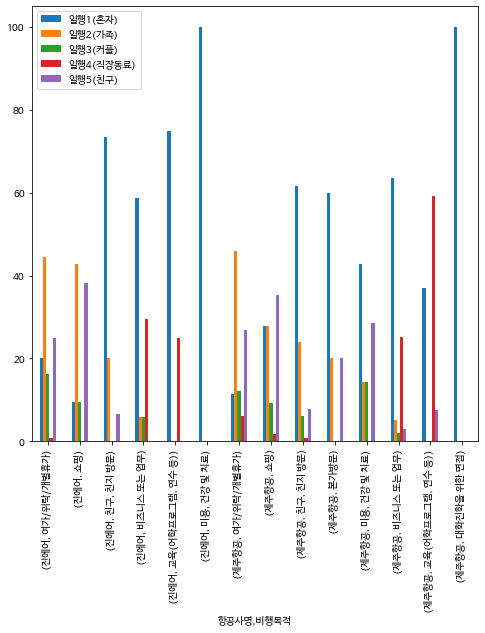

In [1733]:
df3_purpose.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.6. 비행목적 분석.png")
#files.download("4.6. 비행목적 분석.png") 

### 4.7. 여행형태 분석

In [1734]:
df3_form_data = [df3_jin_form, df3_jeju_form]
df3_form = pd.concat(df3_form_data).round(decimals = 2)
df3_form.iloc[:,[1]]

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.7. 여행형태 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.7. 여행형태 분석.csv')

일행2(가족)
항공사명 여행형태                         
진에어  패키지 여행(Package tour)    44.74
     개별 여행                   35.17
제주항공 패키지 여행(Package tour)    52.19
     개별 여행                   31.79

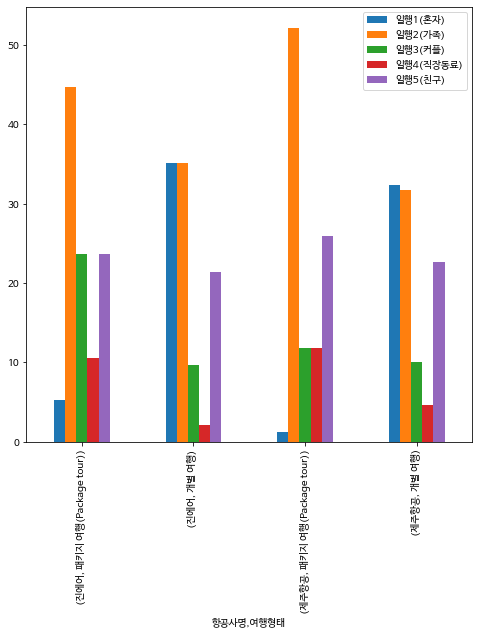

In [1735]:
df3_form.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.7. 여행형태 분석.png")
#files.download("4.7. 여행형태 분석.png") 

### 4.8. 여행일수 분석

In [1736]:
df3_days_data = [df3_jin_days, df3_jeju_days]
df3_days = pd.concat(df3_days_data).round(decimals = 2)
df3_days

#저장 및 다운로드 기능
#df3_jin_days.to_csv('4.8. 여행일수 분석.csv', encoding = 'utf-8-sig') 
#files.download('4.8. 여행일수 분석.csv')

일행1(혼자)  일행2(가족)  일행3(커플)  일행4(직장동료)  일행5(친구)
항공사명 여행일수                                                           
진에어  1개월 이내(1일 ~ 30일)    27.68    37.85    12.43       3.95    22.60
     1개월 이상(31일 이상)      66.67    16.67    16.67       0.00     0.00
제주항공 1개월 이내(1일 ~ 30일)    17.72    41.27    10.81       7.74    24.63
     이민/여행 등 편도 일정       78.57    14.29     7.14       0.00     0.00
     1개월 이상(31일 이상)      82.35     0.00    11.76       2.94     2.94

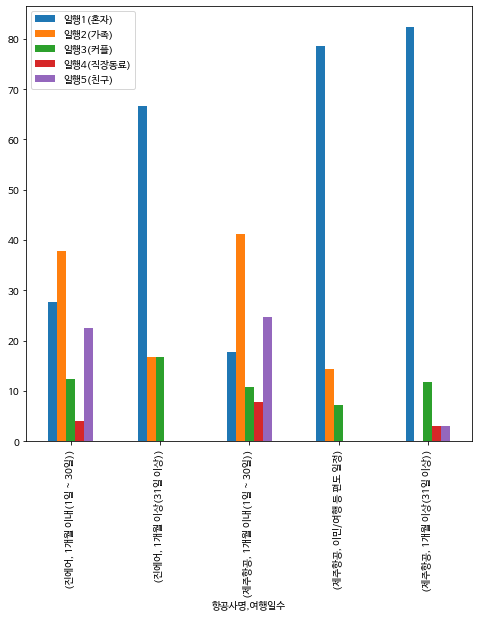

In [1737]:
df3_days.plot.bar(figsize=(8, 8))

#저장 및 다운로드 기능
#plt.savefig("4.8. 여행일수 분석.png")
#files.download("4.8. 여행일수 분석.png") 